# Model Training with YOLO & Model Optimization

# 1. Import & Install


In [1]:
## Import 

import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/README.dataset.txt
/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/README.roboflow.txt
/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/data.yaml
/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/sample_video.mp4
/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/sample_image.jpg
/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/valid/labels/12_mp4-10_jpg.rf.4bb699a2ec90e19cb4680ee239ae579c.txt
/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/valid/labels/6_mp4-31_jpg.rf.c786274ab129629ca618e454b4146f11.txt
/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/valid/labels/6_mp4-29_jpg.rf.e73ca25e92e590b325006f010ad4e319.txt
/kaggle/input/top-view

## 1.1 install ultralytics

In [3]:
!pip install ultralytics 



## 1.2.import YOLO

In [7]:
from ultralytics import YOLO

# 2. Data Set Paths

In [9]:
import yaml
import matplotlib.pyplot as plt


data_dir = '/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset'

train_dir = f'{data_dir}/train'
val_dir   = f'{data_dir}/valid'

yaml_path  = f'{data_dir}/data.yaml'

# Extract Image Paths

def extract_image_paths(base_path):

    images_dir = f'{base_path}/images'
    image_paths = []
    
    for file in os.listdir(images_dir):
        if file.endswith(".png") or file.endswith(".jpg"): 
            image_path = os.path.join(images_dir, file)
            image_paths.append(image_path)

    return image_paths

image_paths = {
    'Training':   extract_image_paths(train_dir),
    'Validation': extract_image_paths(val_dir)
}


# Extract Class Names

def extract_class_names(yaml_path):
    
    with open(yaml_path, 'r', encoding='utf-8') as f:
        data = yaml.safe_load(f)
    class_names = data.get('names')
    
    return class_names

class_names = extract_class_names(yaml_path)

print(f"Class names: {class_names}")

Class names: ['Vehicle']


# 3.Model Training with Yolo11


## 3.1. Model import

In [10]:
model_1 = YOLO("yolo11n.pt")
print("Model loaded successfully!")

Model loaded successfully!


In [12]:
image_size = 640
batch_size = 16
epochs = 50
temp_save_dir = 'temp_output_folder_11Opt'

In [13]:
training_results = model_1.train(
    data = yaml_path,
    imgsz = image_size,
    batch = batch_size,
    epochs = epochs,
    lr0 = 0.001,
    optimizer = 'AdamW',
    project = temp_save_dir,
    name = 'train'
)

Ultralytics 8.3.240 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         90        937      0.919      0.942      0.976      0.738
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to /kaggle/working/temp_output_folder_11Opt/train


## 3.2 Analysis Trained Model

In [15]:
# Loading Results Data
temp_save_dir = "/kaggle/working/temp_output_folder_11Opt"
results_df = pd.read_csv(f"{temp_save_dir}/train/results.csv")

# Plots saving path
plot_save_dir = "/kaggle/working/temp_output_folder_11Opt/train/plots"
plot_Pre_save_dir = "/kaggle/working/temp_output_folder_11Opt/Val/plots"
# Create the directory if it doesn't exist
os.makedirs(plot_save_dir, exist_ok=True)
os.makedirs(plot_Pre_save_dir, exist_ok=True)

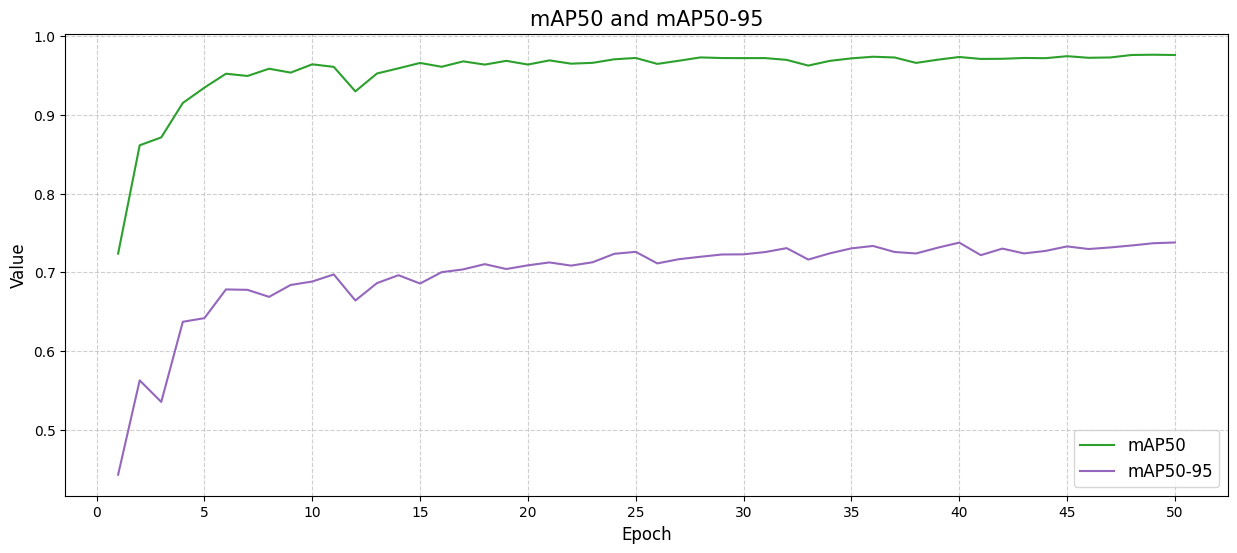

In [16]:
# Create and save the mAP plot
plt.figure(figsize=(15, 6))
plt.plot(range(1,epochs+1), results_df["metrics/mAP50(B)"], 
         label="mAP50", color="#2ca02c")
plt.plot(range(1,epochs+1), results_df["metrics/mAP50-95(B)"], 
         label="mAP50-95", color="#9467bd")
plt.title("mAP50 and mAP50-95", fontsize=15)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.xticks(range(0,epochs+1,epochs//10))
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Save the figure before showing it
plt.savefig(os.path.join(plot_save_dir, "map_metrics.png"), dpi=300, bbox_inches='tight')
plt.show()

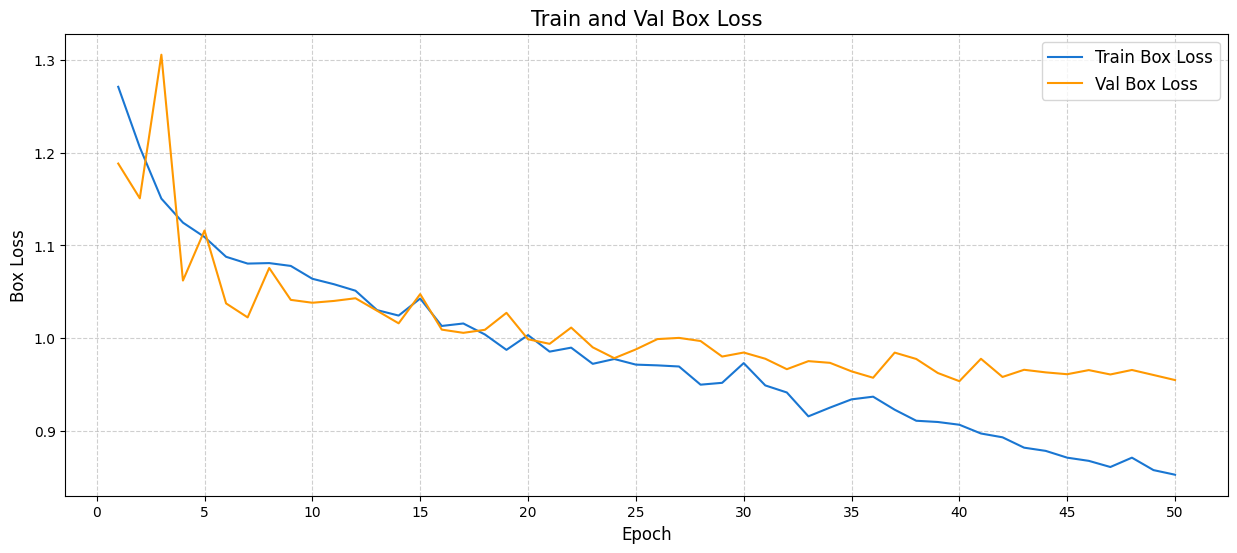

In [17]:
plt.figure(figsize=(15, 6))
plt.plot(range(1,epochs+1), results_df["train/box_loss"], 
         label="Train Box Loss", color="#1976d2")
plt.plot(range(1,epochs+1), results_df["val/box_loss"], 
         label="Val Box Loss", color="#ff9800")
plt.title("Train and Val Box Loss", fontsize=15)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Box Loss", fontsize=12)
plt.xticks(range(0,epochs+1,epochs//10))
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Save the figure before showing it
plt.savefig(os.path.join(plot_save_dir, "Train and Val Box Loss.png"), dpi=300, bbox_inches='tight')
plt.show()

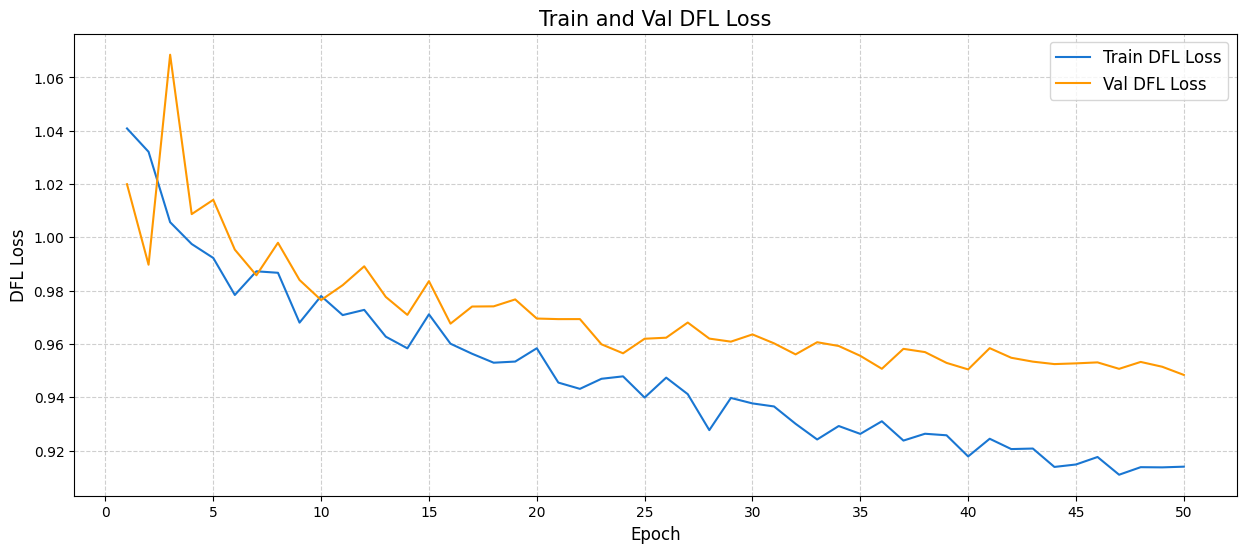

In [18]:
plt.figure(figsize=(15, 6))
plt.plot(range(1,epochs+1), results_df["train/dfl_loss"], 
         label="Train DFL Loss", color="#1976d2")
plt.plot(range(1,epochs+1), results_df["val/dfl_loss"], 
         label="Val DFL Loss", color="#ff9800")
plt.title("Train and Val DFL Loss", fontsize=15)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("DFL Loss", fontsize=12)
plt.xticks(range(0,epochs+1,epochs//10))
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
# Save the figure before showing it
plt.savefig(os.path.join(plot_save_dir, "Train and Val DFL Loss.png"), dpi=300, bbox_inches='tight')

plt.show()

## 3.3 Prediction & comparing with Ground truth data


In [20]:
#Import
import random
from matplotlib.gridspec import GridSpec
from skimage.io import imread
import cv2

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Vehicle'}
obb: None
orig_img: array([[[ 64,  81,  77],
        [ 35,  55,  50],
        [ 33,  53,  48],
        ...,
        [ 14,  25,  23],
        [ 23,  31,  30],
        [ 12,  20,  19]],

       [[ 65,  82,  78],
        [ 39,  56,  52],
        [ 29,  49,  44],
        ...,
        [ 16,  27,  25],
        [ 21,  29,  28],
        [ 12,  20,  19]],

       [[ 62,  79,  75],
        [ 49,  66,  62],
        [ 33,  53,  48],
        ...,
        [ 19,  27,  26],
        [ 21,  27,  26],
        [ 16,  22,  21]],

       ...,

       [[154, 154, 160],
        [155, 155, 161],
        [156, 156, 162],
        ...,
        [135, 136, 150],
        [133, 135, 146],
        [132, 134, 145]],

       [[156, 156, 162],
        [157, 157, 163],
        [157, 157, 163],
        ...,
        [123, 124, 138],
        [123, 125, 136],
        [12

/tmp/ipykernel_47/2825191610.py:176: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.2)


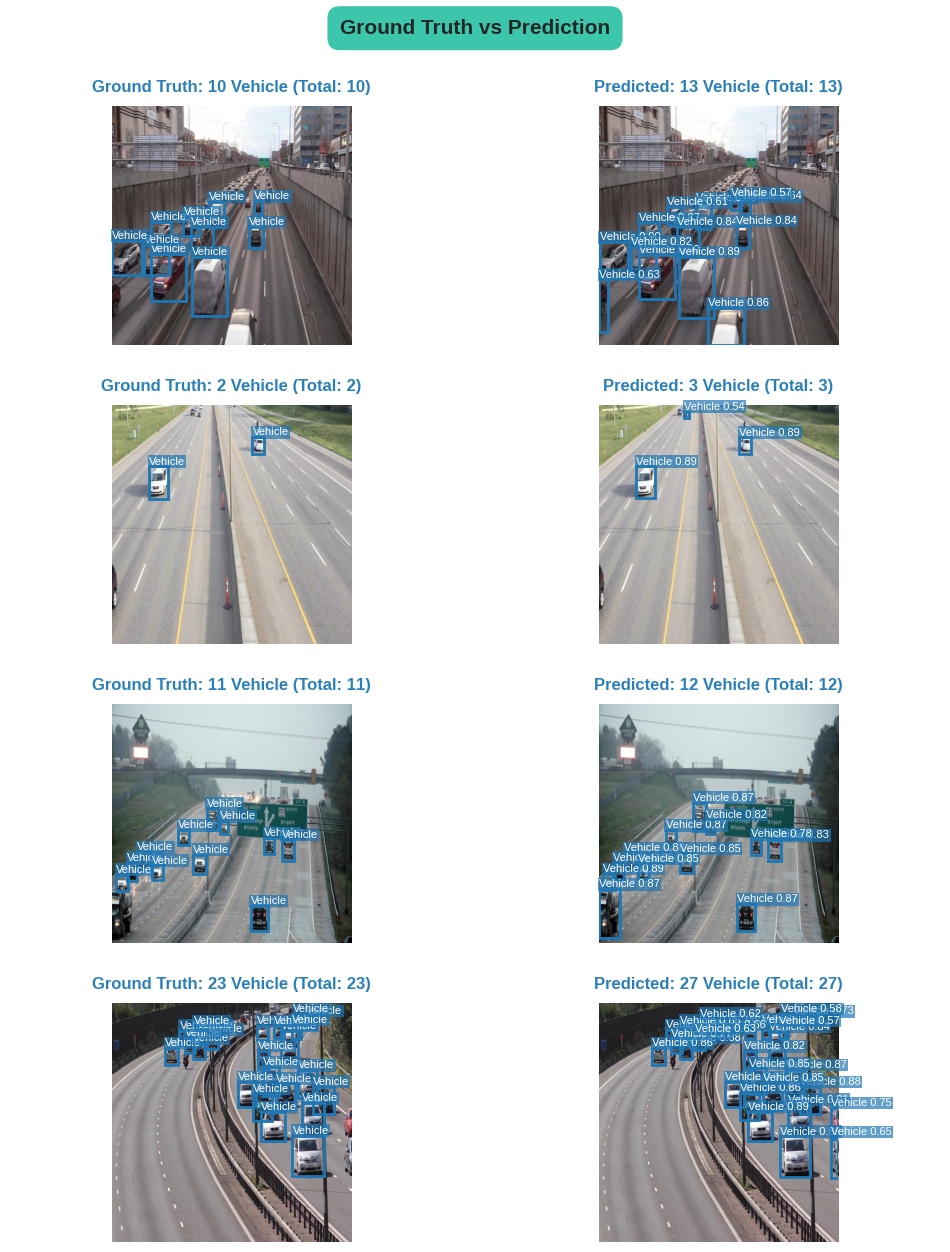

In [23]:
# Extract Class Names

def extract_class_names(yaml_path):
    
    with open(yaml_path, 'r', encoding='utf-8') as f:
        data = yaml.safe_load(f)
    class_names = data.get('names')
    
    return class_names

class_names = extract_class_names(yaml_path)

def show_gt_image(ax, image_path, class_names, color):                       #Displaying an image with its ground truth bounding boxes via this function

    ax.imshow(imread(image_path))                                            #Loads and displays the image
    
    image_path = os.path.normpath(image_path)                                 #Finds the corresponding label file
    parts = image_path.split(os.sep)
    parts[parts.index('images')] = 'labels'
    label_path = os.path.splitext(os.sep.join(parts))[0] + '.txt'

    image = imread(image_path)                                                 #Gets image dimensions
    h, w = image.shape[:2]
    #####
    # Count vehicles by class
    vehicle_counts = {}
    ####
    with open(label_path, 'r') as f:                                           #Reads and processes ground truth annotations
        lines = f.readlines()

    for line in lines:                                                         # Storing normalized coordinates (0-1): class_id, center_x, center_y, width, height
        cls, x_c, y_c, bw, bh = map(float, line.strip().split())               # Converts normalized coordinates to pixel coordinates
        x_c, y_c, bw, bh = x_c*w, y_c*h, bw*w, bh*h
        x_min, y_min = x_c - bw/2, y_c - bh/2
        #Draws bounding boxes and labels
        ax.add_patch(plt.Rectangle((x_min, y_min), bw, bh,
                                   edgecolor=color, facecolor='none', linewidth=2))
        ax.text(x_min, max(y_min - 5, 0), class_names[int(cls)],
                color='white', fontsize=8,
                bbox=dict(facecolor=color, alpha=0.7, edgecolor='none', pad=1))
    #############
        # Count vehicles by class
        cls_name = class_names[int(cls)]
        if cls_name in vehicle_counts:
            vehicle_counts[cls_name] += 1
        else:
            vehicle_counts[cls_name] = 1
    
    # Create title with vehicle counts
    title = "Ground Truth: "
    if vehicle_counts:
        title += ", ".join([f"{count} {cls}" for cls, count in vehicle_counts.items()])
        title += f" (Total: {sum(vehicle_counts.values())})"
    else:
        title += "No vehicles"

   ############# 
    ax.set_title(title, fontsize=12, color="#2980B9", fontweight='bold', pad=10)
    ax.axis('off')
    
def show_pred_image(ax, predict_results, image_path, class_names, color):      #displaying an image with the model's predicted bounding boxes

    idx = next(                                                                #Finding the prediction result for the given image
        (i for i, r in enumerate(predict_results) if r.path == image_path),
        None
    )
#############
    if idx is None:
        ax.text(0.5, 0.5, "No prediction available", 
                ha='center', va='center', fontsize=14, color='red')
        ax.set_title("Predicted: No data", fontsize=12, color="#2980B9", fontweight='bold', pad=10)
        ax.axis('off')
        return
#############
    
    result = predict_results[idx]

    image = cv2.cvtColor(result.orig_img, cv2.COLOR_BGR2RGB)                    #Preparing the image for display with overting BGR (OpenCV default) to RGB for proper display
    h, w = image.shape[:2]
    
    ax.imshow(image)
    
  
    # Count vehicles by class
    vehicle_counts = {}
    
    if result.boxes is not None and len(result.boxes) > 0:
        for i in range(len(result.boxes)):
            try:
                # Get box coordinates
                if hasattr(result.boxes.xyxy, 'shape') and len(result.boxes.xyxy.shape) > 1:
                    xyxy = result.boxes.xyxy[i].cpu().numpy()
                else:
                    xyxy = result.boxes.xyxy.cpu().numpy()[0]
                    
                x_min, y_min, x_max, y_max = xyxy
                bw = x_max - x_min
                bh = y_max - y_min
                
                # Get class and confidence
                if hasattr(result.boxes.cls, 'shape') and len(result.boxes.cls.shape) > 0:
                    cls_id = int(result.boxes.cls[i].cpu().numpy())
                else:
                    cls_id = int(result.boxes.cls.cpu().numpy())
                    
                if hasattr(result.boxes.conf, 'shape') and len(result.boxes.conf.shape) > 0:
                    conf = float(result.boxes.conf[i].cpu().numpy())
                else:
                    conf = float(result.boxes.conf.cpu().numpy())
                
                # Draw box
                ax.add_patch(plt.Rectangle(
                    (x_min, y_min), bw, bh,
                    edgecolor=color, facecolor='none', linewidth=2
                ))
                
                # Add label with confidence
                ax.text(
                    x_min, max(y_min - 5, 0),
                    f"{class_names[cls_id]} {conf:.2f}",
                    color='white', fontsize=8,
                    bbox=dict(facecolor=color, alpha=0.7, edgecolor='none', pad=1)
                )
                
                # Count vehicles by class
                cls_name = class_names[cls_id]
                if cls_name in vehicle_counts:
                    vehicle_counts[cls_name] += 1
                else:
                    vehicle_counts[cls_name] = 1
            except Exception as e:
                print(f"Error processing box {i}: {e}")
    
    # Create title with vehicle counts
    title = "Predicted: "
    if vehicle_counts:
        title += ", ".join([f"{count} {cls}" for cls, count in vehicle_counts.items()])
        title += f" (Total: {sum(vehicle_counts.values())})"
    else:
        title += "No vehicles"
        
    ax.set_title(title, fontsize=12, color="#2980B9", fontweight='bold', pad=10)
    ax.axis('off')
    
def show_compare_gt_pred(gt_images_dir, predict_results, class_names):
    """Creating a side-by-side comparison of ground truth and predictions"""
    gt_image_paths = []
    for file in os.listdir(gt_images_dir):
        if file.endswith(".png") or file.endswith(".jpg"): 
            image_path = os.path.join(gt_images_dir, file)
            gt_image_paths.append(image_path)
    
    selected_image_paths = random.sample(gt_image_paths, min(4, len(gt_image_paths)))
    
    plt.style.use('seaborn-v0_8-white')
    
    fig = plt.figure(figsize=(12, 16))
    gs = GridSpec(5, 2, height_ratios=[0.14, 0.92, 0.92, 0.92, 0.92],
                  wspace=0.1, hspace=0.3, figure=fig)
    
    main_title_ax = fig.add_subplot(gs[0, :])
    main_title_ax.text(0.5, 0.5, "Ground Truth vs Prediction",
                       fontsize=15, fontweight='bold', ha='center', va='center',
                       bbox=dict(facecolor='#1ABC9C', edgecolor='none', boxstyle='round,pad=0.6', alpha=0.85))
    main_title_ax.axis('off')

    color = np.array([0.12157, 0.46667, 0.70588])
    
    for i, image_path in enumerate(selected_image_paths):
        ax_gt = fig.add_subplot(gs[i+1, 0])
        show_gt_image(ax_gt, image_path, class_names, color)
        
        ax_pred = fig.add_subplot(gs[i+1, 1])
        show_pred_image(ax_pred, predict_results, image_path, class_names, color)
    
    plt.tight_layout(pad=0.2)
    # Save the figure before showing it
    plt.savefig(os.path.join(plot_Pre_save_dir, "Ground Truth vs Prediction"), dpi=300, bbox_inches='tight')
    plt.show()
    plt.style.use('default')
# # Main Execution
gt_images_dir = f'{val_dir}/images'

predict_results = model_1.predict(                                                #Runing the model on validation images
    source = f'{val_dir}/images',                                               #Calling the comparison function to visualize results
    imgsz = image_size,
    batch = batch_size,                                                         
    iou=0.7,                                                                    # Threshold 1: only keep objects with confidence above this value
    conf =0.5,                                                                  # Threshold 2: remove objects that overlap with IoU greater than this value
    verbose = False
) 
print(predict_results)
show_compare_gt_pred(gt_images_dir, predict_results, class_names)


## 3.4  Cleaning up temporary file & Saving

In [23]:
#shutil.rmtree('temp_output_folder', ignore_errors=True)                         
!zip -r model_outputs.zip /kaggle/working/


  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/yolo11n.pt (deflated 11%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
  adding: kaggle/working/.virtual_documents/__notebook_source__.ipynb (deflated 83%)
  adding: kaggle/working/temp_output_folder_11Opt/ (stored 0%)
  adding: kaggle/working/temp_output_folder_11Opt/train/ (stored 0%)
  adding: kaggle/working/temp_output_folder_11Opt/train/results.csv (deflated 62%)
  adding: kaggle/working/temp_output_folder_11Opt/train/train_batch1361.jpg (deflated 4%)
  adding: kaggle/working/temp_output_folder_11Opt/train/weights/ (stored 0%)
  adding: kaggle/working/temp_output_folder_11Opt/train/weights/last.pt (deflated 10%)
  adding: kaggle/working/temp_output_folder_11Opt/train/weights/best.pt (deflated 10%)
  adding: kaggle/working/temp_output_folder_11Opt/train/val_batch0_pred.jpg (deflated 4%)
  adding: kaggle/working/temp_output_folder_11Opt/train/plots/ (stored 0%)
  adding: kaggle/working/temp_output_folder_11Op

# 4.Model Training with Yolo8


In [27]:
#Import
import random
from matplotlib.gridspec import GridSpec
from skimage.io import imread
import cv2

## 4.1 Model import


In [28]:
model_2 = YOLO("yolov8n.pt")
print("Model loaded successfully!")

Model loaded successfully!


In [29]:
image_size = 640
batch_size = 16
epochs = 50
temp_save_dir = 'temp_output_folder_8'

In [30]:
training_results = model_2.train(
    data = yaml_path,
    imgsz = image_size,
    batch = batch_size,
    epochs = epochs,
    lr0 = 0.001,
    optimizer = 'AdamW',
    project = temp_save_dir,
    name = 'train'
)

Ultralytics 8.3.240 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         90        937      0.924      0.919      0.972      0.736
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to /kaggle/working/temp_output_folder_8/train


## 4.2 *Analysis Trained Model*

In [31]:
# Loading Results Data
temp_save_dir = "/kaggle/working/temp_output_folder_8"
results_df = pd.read_csv(f"{temp_save_dir}/train/results.csv")

# Plots saving path
plot_save_dir = "/kaggle/working/temp_output_folder_8/train/plots"
plot_Pre_save_dir = "/kaggle/working/temp_output_folder_8/Val/plots"
# Create the directory if it doesn't exist
os.makedirs(plot_save_dir, exist_ok=True)
os.makedirs(plot_Pre_save_dir, exist_ok=True)

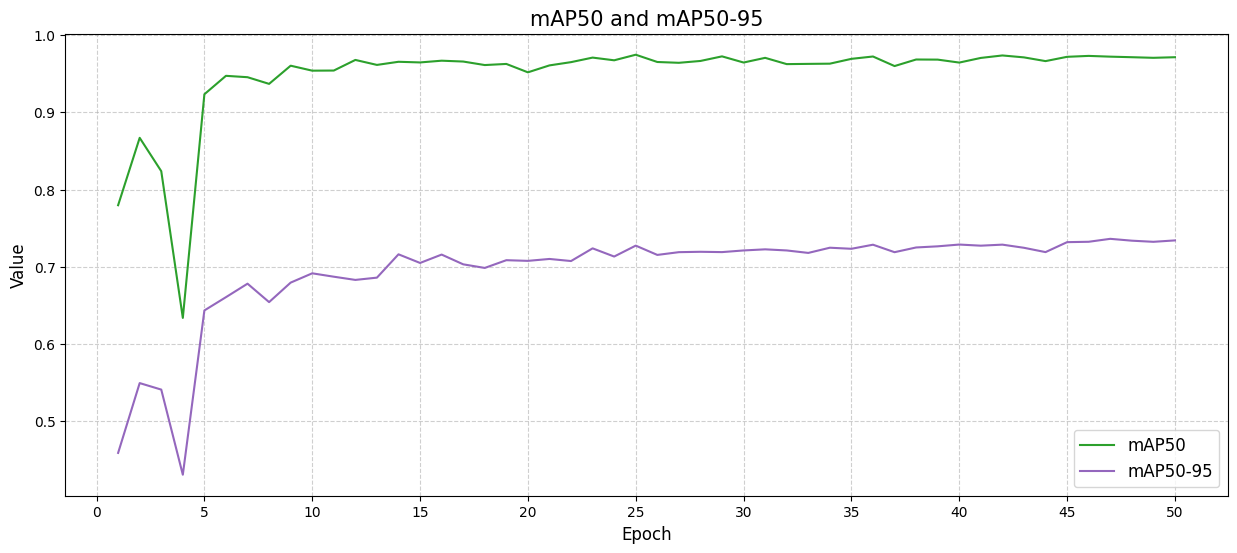

In [32]:
# Create and save the mAP plot
plt.figure(figsize=(15, 6))
plt.plot(range(1,epochs+1), results_df["metrics/mAP50(B)"], 
         label="mAP50", color="#2ca02c")
plt.plot(range(1,epochs+1), results_df["metrics/mAP50-95(B)"], 
         label="mAP50-95", color="#9467bd")
plt.title("mAP50 and mAP50-95", fontsize=15)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.xticks(range(0,epochs+1,epochs//10))
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Save the figure before showing it
plt.savefig(os.path.join(plot_save_dir, "map_metrics.png"), dpi=300, bbox_inches='tight')

# Now show the figure
plt.show()

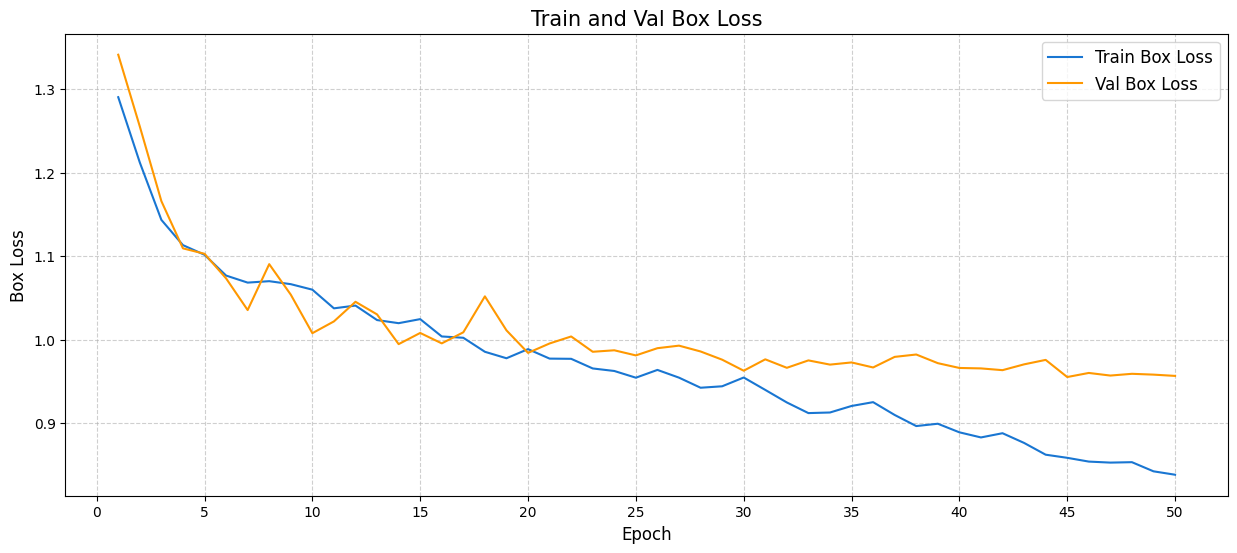

In [33]:
plt.figure(figsize=(15, 6))
plt.plot(range(1,epochs+1), results_df["train/box_loss"], 
         label="Train Box Loss", color="#1976d2")
plt.plot(range(1,epochs+1), results_df["val/box_loss"], 
         label="Val Box Loss", color="#ff9800")
plt.title("Train and Val Box Loss", fontsize=15)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Box Loss", fontsize=12)
plt.xticks(range(0,epochs+1,epochs//10))
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Save the figure before showing it
plt.savefig(os.path.join(plot_save_dir, "Train and Val Box Loss.png"), dpi=300, bbox_inches='tight')

plt.show()

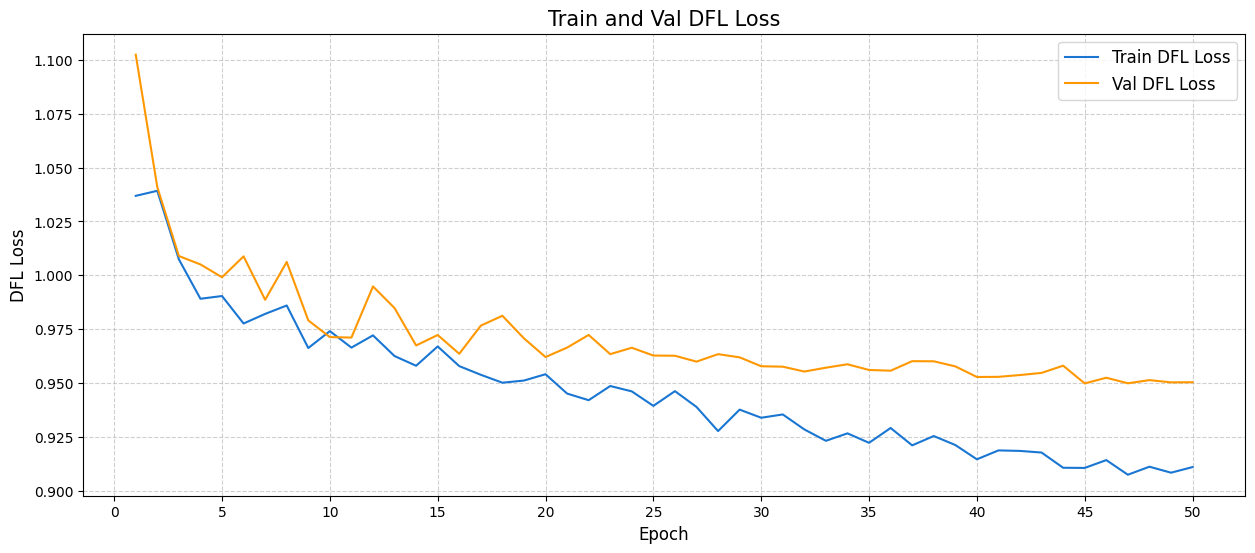

In [34]:
plt.figure(figsize=(15, 6))
plt.plot(range(1,epochs+1), results_df["train/dfl_loss"], 
         label="Train DFL Loss", color="#1976d2")
plt.plot(range(1,epochs+1), results_df["val/dfl_loss"], 
         label="Val DFL Loss", color="#ff9800")
plt.title("Train and Val DFL Loss", fontsize=15)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("DFL Loss", fontsize=12)
plt.xticks(range(0,epochs+1,epochs//10))
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
# Save the figure before showing it
plt.savefig(os.path.join(plot_save_dir, "Train and Val DFL Loss.png"), dpi=300, bbox_inches='tight')

plt.show()

## 4.3 Prediction & comparing with Ground truth data


In [36]:
def count_predicted_objects(predict_results, class_names):
    counts = {name: 0 for name in class_names}

    for result in predict_results:
        for box in result.boxes:
            cls_id = int(box.cls.cpu().numpy())
            counts[class_names[cls_id]] += 1

    return counts


# Usage:
counts = count_predicted_objects(predict_results, class_names)
print("Predicted counts:")
for cls, num in counts.items():
    print(f"{cls}: {num}")

Predicted counts:
Vehicle: 990


/tmp/ipykernel_47/4282510091.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cls_id = int(box.cls.cpu().numpy())


In [35]:
#Import
import random
from matplotlib.gridspec import GridSpec
from skimage.io import imread
import cv2

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Vehicle'}
obb: None
orig_img: array([[[ 64,  81,  77],
        [ 35,  55,  50],
        [ 33,  53,  48],
        ...,
        [ 14,  25,  23],
        [ 23,  31,  30],
        [ 12,  20,  19]],

       [[ 65,  82,  78],
        [ 39,  56,  52],
        [ 29,  49,  44],
        ...,
        [ 16,  27,  25],
        [ 21,  29,  28],
        [ 12,  20,  19]],

       [[ 62,  79,  75],
        [ 49,  66,  62],
        [ 33,  53,  48],
        ...,
        [ 19,  27,  26],
        [ 21,  27,  26],
        [ 16,  22,  21]],

       ...,

       [[154, 154, 160],
        [155, 155, 161],
        [156, 156, 162],
        ...,
        [135, 136, 150],
        [133, 135, 146],
        [132, 134, 145]],

       [[156, 156, 162],
        [157, 157, 163],
        [157, 157, 163],
        ...,
        [123, 124, 138],
        [123, 125, 136],
        [12

/tmp/ipykernel_47/274199537.py:92: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cls_id = int(box.cls.cpu().numpy())
/tmp/ipykernel_47/274199537.py:93: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  conf = float(box.conf.cpu().numpy())
/tmp/ipykernel_47/274199537.py:92: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cls_id = int(box.cls.cpu().numpy())
/tmp/ipykernel_47/274199537.py:93: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated

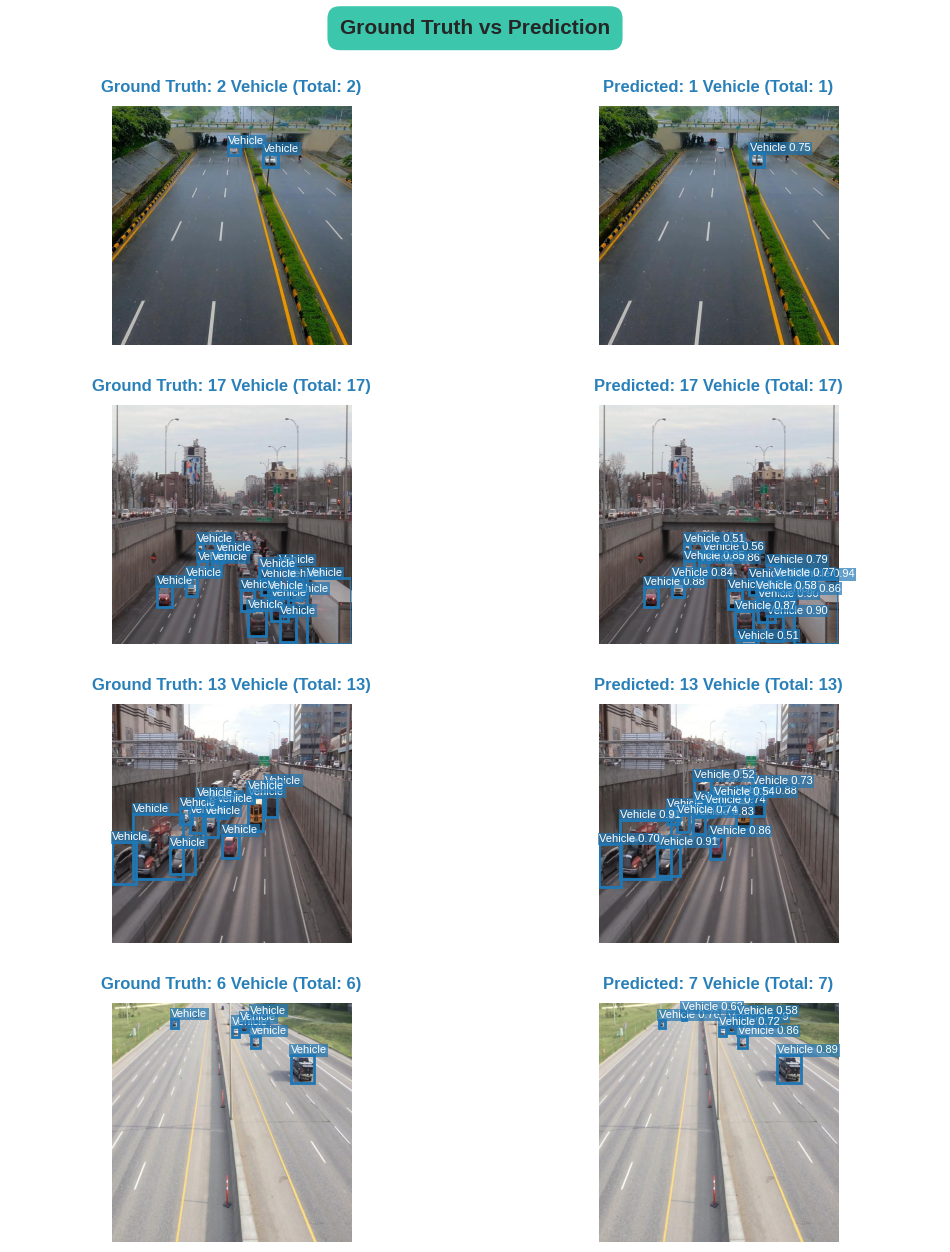

In [38]:
# Extract Class Names

def extract_class_names(yaml_path):
    
    with open(yaml_path, 'r', encoding='utf-8') as f:
        data = yaml.safe_load(f)
    class_names = data.get('names')
    
    return class_names

class_names = extract_class_names(yaml_path)

def show_gt_image(ax, image_path, class_names, color):                       #Displaying an image with its ground truth bounding boxes via this function

    ax.imshow(imread(image_path))                                            #Loads and displays the image
    
    image_path = os.path.normpath(image_path)                                 #Finds the corresponding label file
    parts = image_path.split(os.sep)
    parts[parts.index('images')] = 'labels'
    label_path = os.path.splitext(os.sep.join(parts))[0] + '.txt'

    image = imread(image_path)                                                 #Gets image dimensions
    h, w = image.shape[:2]
    # Count vehicles by class
    vehicle_counts = {}
    
    with open(label_path, 'r') as f:                                           #Reads and processes ground truth annotations
        lines = f.readlines()
            
    for line in lines:                                                         # Storing normalized coordinates (0-1): class_id, center_x, center_y, width, height
        cls, x_c, y_c, bw, bh = map(float, line.strip().split())               # Converts normalized coordinates to pixel coordinates
        x_c, y_c, bw, bh = x_c*w, y_c*h, bw*w, bh*h
        x_min, y_min = x_c - bw/2, y_c - bh/2
        #Draws bounding boxes and labels
        ax.add_patch(plt.Rectangle((x_min, y_min), bw, bh,
                                   edgecolor=color, facecolor='none', linewidth=2))
        ax.text(x_min, max(y_min - 5, 0), class_names[int(cls)],
                color='white', fontsize=8,
                bbox=dict(facecolor=color, alpha=0.7, edgecolor='none', pad=1))

        # Count vehicles by class
        cls_name = class_names[int(cls)]
        if cls_name in vehicle_counts:
            vehicle_counts[cls_name] += 1
        else:
            vehicle_counts[cls_name] = 1
    
    # Create title with vehicle counts
    title = "Ground Truth: "
    if vehicle_counts:
        title += ", ".join([f"{count} {cls}" for cls, count in vehicle_counts.items()])
        title += f" (Total: {sum(vehicle_counts.values())})"
    else:
        title += "No vehicles"
        
    ax.set_title(title, fontsize=12, color="#2980B9", fontweight='bold', pad=10)
    ax.axis('off')
    
    
def show_pred_image(ax, predict_results, image_path, class_names, color):      #displaying an image with the model's predicted bounding boxes

    idx = next(                                                                #Finding the prediction result for the given image
        (i for i, r in enumerate(predict_results) if r.path == image_path),
        None
    )

    if idx is None:
        ax.text(0.5, 0.5, "No prediction available", 
                ha='center', va='center', fontsize=14, color='red')
        ax.set_title("Predicted: No data", fontsize=12, color="#2980B9", fontweight='bold', pad=10)
        ax.axis('off')
        return
        
    result = predict_results[idx]

    image = cv2.cvtColor(result.orig_img, cv2.COLOR_BGR2RGB)                    #Preparing the image for display with overting BGR (OpenCV default) to RGB for proper display
    h, w = image.shape[:2]
    
    ax.imshow(image)
    
  
    # Count vehicles by class
    vehicle_counts = {}
    
    if result.boxes is not None and len(result.boxes) > 0:
        for box in result.boxes:
            try:
                xyxy = box.xyxy.cpu().numpy()[0]
                x_min, y_min, x_max, y_max = xyxy
                bw = x_max - x_min
                bh = y_max - y_min
                cls_id = int(box.cls.cpu().numpy())
                conf = float(box.conf.cpu().numpy())
                
                # Draw box
                ax.add_patch(plt.Rectangle(
                    (x_min, y_min), bw, bh,
                    edgecolor=color, facecolor='none', linewidth=2
                ))
                
                # Add label with confidence
                ax.text(
                    x_min, max(y_min - 5, 0),
                    f"{class_names[cls_id]} {conf:.2f}",
                    color='white', fontsize=8,
                    bbox=dict(facecolor=color, alpha=0.7, edgecolor='none', pad=1)
                )
                
                # Count vehicles by class
                cls_name = class_names[cls_id]
                if cls_name in vehicle_counts:
                    vehicle_counts[cls_name] += 1
                else:
                    vehicle_counts[cls_name] = 1
            except Exception as e:
                print(f"Error processing box: {e}")
    
    # Create title with vehicle counts
    title = "Predicted: "
    if vehicle_counts:
        title += ", ".join([f"{count} {cls}" for cls, count in vehicle_counts.items()])
        title += f" (Total: {sum(vehicle_counts.values())})"
    else:
        title += "No vehicles"
        
    ax.set_title(title, fontsize=12, color="#2980B9", fontweight='bold', pad=10)
    ax.axis('off')
    
    
def show_compare_gt_pred(gt_images_dir, predict_results, class_names):          # creating a side-by-side comparison of ground truth and predictions
    
    gt_image_paths = []                                                         #Collecting image paths and selects random samples                                                   
    for file in os.listdir(gt_images_dir):
        if file.endswith(".png") or file.endswith(".jpg"): 
            image_path = os.path.join(gt_images_dir, file)
            gt_image_paths.append(image_path)                                   #Finding all images in the ground truth directory
    
    selected_image_paths = random.sample(gt_image_paths, min(4, len(gt_image_paths)))
    
    plt.style.use('seaborn-v0_8-white')
    
    #Seting up the figure layout using GridSpec
    fig = plt.figure(figsize=(12, 16))
    gs = GridSpec(5, 2, height_ratios=[0.14, 0.92, 0.92, 0.92, 0.92],
                  wspace=0.1, hspace=0.3, figure=fig)
    
    main_title_ax = fig.add_subplot(gs[0, :])
    main_title_ax.text(0.5, 0.5, "Ground Truth vs Prediction",
                       fontsize=15, fontweight='bold', ha='center', va='center',
                       bbox=dict(facecolor='#1ABC9C', edgecolor='none', boxstyle='round,pad=0.6', alpha=0.85))
    main_title_ax.axis('off')

    color = np.array([0.12157, 0.46667, 0.70588])
    
    for i, image_path in enumerate(selected_image_paths):
        ax_gt = fig.add_subplot(gs[i+1, 0])
        show_gt_image(ax_gt, image_path, class_names, color)
        
        ax_pred = fig.add_subplot(gs[i+1, 1])
        show_pred_image(ax_pred, predict_results, image_path, class_names, color)
    
    plt.tight_layout(pad=0.2)
    # Save the figure before showing it
    plt.savefig(os.path.join(plot_Pre_save_dir, "Ground Truth vs Prediction"), dpi=300, bbox_inches='tight')
    plt.show()
    plt.style.use('default')
# # Main Execution
gt_images_dir = f'{val_dir}/images'

predict_results = model_2.predict(                                                #Runing the model on validation images
    source = f'{val_dir}/images',                                               #Calling the comparison function to visualize results
    imgsz = image_size,
    batch = batch_size,                                                         
    iou=0.7,                                                                    # Threshold 1: only keep objects with confidence above this value
    conf =0.5,                                                                  # Threshold 2: remove objects that overlap with IoU greater than this value
    verbose = False
) 
print(predict_results)
show_compare_gt_pred(gt_images_dir, predict_results, class_names)


## 4.4 Cleaning up temporary file

In [31]:
#shutil.rmtree('temp_output_folder', ignore_errors=True)                         
!zip -r model_outputs.zip /kaggle/working/


updating: kaggle/working/ (stored 0%)
updating: kaggle/working/.virtual_documents/ (stored 0%)
updating: kaggle/working/yolo11n.pt (deflated 11%)
updating: kaggle/working/temp_output_folder_11Opt/ (stored 0%)
updating: kaggle/working/temp_output_folder_11Opt/Val/ (stored 0%)
updating: kaggle/working/temp_output_folder_11Opt/Val/plots/ (stored 0%)
updating: kaggle/working/temp_output_folder_11Opt/Val/plots/Ground Truth vs Prediction.png (deflated 2%)
updating: kaggle/working/temp_output_folder_11Opt/train/ (stored 0%)
updating: kaggle/working/temp_output_folder_11Opt/train/results.png (deflated 9%)
updating: kaggle/working/temp_output_folder_11Opt/train/train_batch1.jpg (deflated 2%)
updating: kaggle/working/temp_output_folder_11Opt/train/val_batch1_labels.jpg (deflated 6%)
updating: kaggle/working/temp_output_folder_11Opt/train/BoxPR_curve.png (deflated 26%)
updating: kaggle/working/temp_output_folder_11Opt/train/results.csv (deflated 62%)
updating: kaggle/working/temp_output_folder_11

# 5. Optimizing YOLO Model Performance

## 5.1. Hyperparameter tuning with Optuna & NMS Processing

### 5.1.1. Hyperparameter training

In [39]:
# Install required packages
!pip install ultralytics optuna
# Import
import optuna
from functools import partial
import torch
import random
from matplotlib.gridspec import GridSpec
from skimage.io import imread
import cv2
#import numpy as np
#import pandas as pd
#import os
#import yaml
#import matplotlib.pyplot as plt
#from ultralytics import YOLO



In [41]:
# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)


# Defining directories for saving results
base_save_dir = '/kaggle/working/Hyperparameter'
optuna_save_dir = f'{base_save_dir}/optuna_trials'
final_model_dir = f'{base_save_dir}/final_model'
os.makedirs(optuna_save_dir, exist_ok=True)
os.makedirs(final_model_dir, exist_ok=True)

# Defining image size and batch size
image_size = 640
batch_size = 16

# Defining the objective function for Optuna
def objective(trial):
    # Defining hyperparameters for optimization
    params = {
        'lr0': trial.suggest_float('lr0', 1e-4, 1e-2, log=True),
        'lrf': trial.suggest_float('lrf', 0.01, 0.2),
        'momentum': trial.suggest_float('momentum', 0.8, 0.99),
        'weight_decay': trial.suggest_float('weight_decay', 0.0001, 0.01, log=True),
        'warmup_epochs': trial.suggest_int('warmup_epochs', 1, 5),
        'warmup_momentum': trial.suggest_float('warmup_momentum', 0.5, 0.95),
        'box': trial.suggest_float('box', 5.0, 15.0),
        'cls': trial.suggest_float('cls', 0.2, 1.0),
        'dfl': trial.suggest_float('dfl', 0.5, 2.5),
        #'fl_gamma': trial.suggest_float('fl_gamma', 0.0, 2.0),
        'hsv_h': trial.suggest_float('hsv_h', 0.0, 0.1),
        'hsv_s': trial.suggest_float('hsv_s', 0.0, 0.9),
        'hsv_v': trial.suggest_float('hsv_v', 0.0, 0.9),
        'degrees': trial.suggest_float('degrees', 0.0, 45.0),
        'translate': trial.suggest_float('translate', 0.0, 0.2),
        'scale': trial.suggest_float('scale', 0.0, 0.9),
        'shear': trial.suggest_float('shear', 0.0, 10.0),
        'perspective': trial.suggest_float('perspective', 0.0, 0.001),
        'flipud': trial.suggest_float('flipud', 0.0, 0.5),
        'fliplr': trial.suggest_float('fliplr', 0.0, 0.5),
        'mosaic': trial.suggest_float('mosaic', 0.0, 1.0),
        'mixup': trial.suggest_float('mixup', 0.0, 0.3)
    }
    
    # Create a new model instance for each trial
    trial_model = YOLO("yolo11n.pt")
    
    # Set trial name
    trial_name = f'trial_{trial.number}'
    
    # Train with current hyperparameters
    try:
        results = trial_model.train(
            data=yaml_path,
            imgsz=image_size,
            batch=batch_size,
            epochs=15,                                     # Use fewer epochs for tuning
            project=optuna_save_dir,
            name=trial_name,
            exist_ok=True,
            **params
        )
        
        # Get the validation mAP50-95 from the results
        metrics_file = f"{optuna_save_dir}/{trial_name}/results.csv"
        if os.path.exists(metrics_file):
            metrics_df = pd.read_csv(metrics_file)
            # Get the best mAP50-95 value
            map50_95 = metrics_df["metrics/mAP50-95(B)"].max()
            return map50_95
        else:
            return 0.0
    except Exception as e:
        print(f"Trial {trial.number} failed with error: {e}")
        return 0.0



In [42]:
# Creating the Optuna study
study = optuna.create_study(direction='maximize', study_name='yolo_optimization')

# Runing optimization 
print("Starting hyperparameter optimization with Optuna...")
study.optimize(objective, n_trials=10)

# Printing best parameters
print("\nBest trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Saving the best parameters to a file
best_params_file = f"{base_save_dir}/best_params.yaml"
with open(best_params_file, 'w') as f:
    yaml.dump(trial.params, f)
print(f"Best parameters saved to {best_params_file}")

# Train the final model with the best parameters
print("\nTraining final model with best parameters...")
final_model = YOLO("yolo11n.pt")
training_results = final_model.train(
    data=yaml_path,
    imgsz=image_size,
    batch=batch_size,
    epochs=50,  # Use full number of epochs for final training
    project=final_model_dir,
    name='train',
    exist_ok=True,
    **trial.params
)


[I 2025-12-19 14:38:13,711] A new study created in memory with name: yolo_optimization


Starting hyperparameter optimization with Optuna...
Ultralytics 8.3.240 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=5.487668084925312, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5675957551328881, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/data.yaml, degrees=5.568581774937276, deterministic=True, device=None, dfl=1.422855058925749, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=True, fliplr=0.37103751499771986, flipud=0.21124877008331577, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.004095847239261363, hsv_s=0.28406462720867315, hsv_v=0.04584175494732871, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.00195162284172802

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         90        937       0.92      0.925       0.97      0.669
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to /kaggle/working/Hyperparameter/optuna_trials/trial_0


[I 2025-12-19 14:40:10,483] Trial 0 finished with value: 0.6685 and parameters: {'lr0': 0.0019516228417280287, 'lrf': 0.1429152719401961, 'momentum': 0.9610226533975375, 'weight_decay': 0.00014560132713649555, 'warmup_epochs': 5, 'warmup_momentum': 0.6884915096290667, 'box': 5.487668084925312, 'cls': 0.5675957551328881, 'dfl': 1.422855058925749, 'hsv_h': 0.004095847239261363, 'hsv_s': 0.28406462720867315, 'hsv_v': 0.04584175494732871, 'degrees': 5.568581774937276, 'translate': 0.02888480367262072, 'scale': 0.09122698108385428, 'shear': 4.965197049476871, 'perspective': 0.0007353851081888091, 'flipud': 0.21124877008331577, 'fliplr': 0.37103751499771986, 'mosaic': 0.41099797427932805, 'mixup': 0.11632019915869521}. Best is trial 0 with value: 0.6685.


Ultralytics 8.3.240 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=6.991305037640502, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.4097520542924107, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/data.yaml, degrees=18.523534228212988, deterministic=True, device=None, dfl=2.273271819832293, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=True, fliplr=0.046446816682894854, flipud=0.003455785489105745, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.09187599444838557, hsv_s=0.804311168358834, hsv_v=0.011120976383106574, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001552171675048847, lrf=0.09431942713574812, mask_ratio=4, max_det=

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         90        937      0.894      0.917      0.966      0.685
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to /kaggle/working/Hyperparameter/optuna_trials/trial_1


[I 2025-12-19 14:42:06,233] Trial 1 finished with value: 0.68505 and parameters: {'lr0': 0.0001552171675048847, 'lrf': 0.09431942713574812, 'momentum': 0.9055446935736517, 'weight_decay': 0.0012296935803663566, 'warmup_epochs': 2, 'warmup_momentum': 0.7870478043870294, 'box': 6.991305037640502, 'cls': 0.4097520542924107, 'dfl': 2.273271819832293, 'hsv_h': 0.09187599444838557, 'hsv_s': 0.804311168358834, 'hsv_v': 0.011120976383106574, 'degrees': 18.523534228212988, 'translate': 0.02620120535103121, 'scale': 0.49316793509391066, 'shear': 9.504777018136181, 'perspective': 0.0003977878437801408, 'flipud': 0.003455785489105745, 'fliplr': 0.046446816682894854, 'mosaic': 0.7539368861049704, 'mixup': 0.022602227755395665}. Best is trial 1 with value: 0.68505.


Ultralytics 8.3.240 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=14.245684509805168, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.6463264649678324, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/data.yaml, degrees=36.86488448625135, deterministic=True, device=None, dfl=1.2789828779608456, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=True, fliplr=0.10493089019177576, flipud=0.18145110803996495, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.043170594613531135, hsv_s=0.29456955135130924, hsv_v=0.45159491375377603, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0012406331059097472, lrf=0.08435772752069466, mask_ratio=4, max_det

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         90        937      0.871      0.906      0.954      0.654
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to /kaggle/working/Hyperparameter/optuna_trials/trial_2


[I 2025-12-19 14:44:03,916] Trial 2 finished with value: 0.65326 and parameters: {'lr0': 0.0012406331059097472, 'lrf': 0.08435772752069466, 'momentum': 0.8401190722070784, 'weight_decay': 0.0039057786232577028, 'warmup_epochs': 5, 'warmup_momentum': 0.8750408387157751, 'box': 14.245684509805168, 'cls': 0.6463264649678324, 'dfl': 1.2789828779608456, 'hsv_h': 0.043170594613531135, 'hsv_s': 0.29456955135130924, 'hsv_v': 0.45159491375377603, 'degrees': 36.86488448625135, 'translate': 0.09659360392019228, 'scale': 0.1429150772670432, 'shear': 9.981134789647813, 'perspective': 0.0003941090742538883, 'flipud': 0.18145110803996495, 'fliplr': 0.10493089019177576, 'mosaic': 0.35026631244030926, 'mixup': 0.2900302058908065}. Best is trial 1 with value: 0.68505.


Ultralytics 8.3.240 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=9.412113243328807, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.6238792808132965, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/data.yaml, degrees=5.370690225911759, deterministic=True, device=None, dfl=2.1354714772113885, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=True, fliplr=0.4814712040953372, flipud=0.4229817577389015, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.027702924617350556, hsv_s=0.4528640260006758, hsv_v=0.42735595126685494, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0041673460045678476, lrf=0.15531884289162728, mask_ratio=4, max_det=300

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         90        937      0.895      0.902      0.958      0.662
Speed: 0.3ms preprocess, 2.4ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to /kaggle/working/Hyperparameter/optuna_trials/trial_3


[I 2025-12-19 14:45:59,380] Trial 3 finished with value: 0.66127 and parameters: {'lr0': 0.0041673460045678476, 'lrf': 0.15531884289162728, 'momentum': 0.8191176764254674, 'weight_decay': 0.0005379043812081543, 'warmup_epochs': 2, 'warmup_momentum': 0.8053549929151818, 'box': 9.412113243328807, 'cls': 0.6238792808132965, 'dfl': 2.1354714772113885, 'hsv_h': 0.027702924617350556, 'hsv_s': 0.4528640260006758, 'hsv_v': 0.42735595126685494, 'degrees': 5.370690225911759, 'translate': 0.18473079206244805, 'scale': 0.6058143240336319, 'shear': 5.001549944075643, 'perspective': 9.846541189863156e-05, 'flipud': 0.4229817577389015, 'fliplr': 0.4814712040953372, 'mosaic': 0.05520487153371478, 'mixup': 0.06448835054640635}. Best is trial 1 with value: 0.68505.


Ultralytics 8.3.240 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=8.132411136336106, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5592461259018627, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/data.yaml, degrees=39.82040508168994, deterministic=True, device=None, dfl=1.0768903141987967, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=True, fliplr=0.14982772153681856, flipud=0.18879325378435252, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.006723249417679722, hsv_s=0.45095584883952505, hsv_v=0.28202745326250883, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.00028925336001241214, lrf=0.08669594963393196, mask_ratio=4, max_det

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         90        937      0.861      0.922      0.955      0.647
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to /kaggle/working/Hyperparameter/optuna_trials/trial_4


[I 2025-12-19 14:47:55,172] Trial 4 finished with value: 0.64731 and parameters: {'lr0': 0.00028925336001241214, 'lrf': 0.08669594963393196, 'momentum': 0.9585486180485912, 'weight_decay': 0.00014663476312688287, 'warmup_epochs': 5, 'warmup_momentum': 0.6764946723492236, 'box': 8.132411136336106, 'cls': 0.5592461259018627, 'dfl': 1.0768903141987967, 'hsv_h': 0.006723249417679722, 'hsv_s': 0.45095584883952505, 'hsv_v': 0.28202745326250883, 'degrees': 39.82040508168994, 'translate': 0.006008938373753359, 'scale': 0.19141748938076264, 'shear': 3.135447932094219, 'perspective': 0.0005462326499879564, 'flipud': 0.18879325378435252, 'fliplr': 0.14982772153681856, 'mosaic': 0.1252870724982822, 'mixup': 0.0855364386375851}. Best is trial 1 with value: 0.68505.


Ultralytics 8.3.240 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=5.299112765941164, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.34787154336714377, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/data.yaml, degrees=7.6360727616330335, deterministic=True, device=None, dfl=2.403733827906771, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=True, fliplr=0.12062881935791414, flipud=0.0872723627216182, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.03216271652025117, hsv_s=0.020730944987354085, hsv_v=0.7031108481829794, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.003840253899885584, lrf=0.12052011035933229, mask_ratio=4, max_det=30

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         90        937      0.907      0.907       0.97      0.691
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to /kaggle/working/Hyperparameter/optuna_trials/trial_5


[I 2025-12-19 14:49:51,933] Trial 5 finished with value: 0.69153 and parameters: {'lr0': 0.003840253899885584, 'lrf': 0.12052011035933229, 'momentum': 0.8904159608488987, 'weight_decay': 0.0004110068156110295, 'warmup_epochs': 3, 'warmup_momentum': 0.6063211638618633, 'box': 5.299112765941164, 'cls': 0.34787154336714377, 'dfl': 2.403733827906771, 'hsv_h': 0.03216271652025117, 'hsv_s': 0.020730944987354085, 'hsv_v': 0.7031108481829794, 'degrees': 7.6360727616330335, 'translate': 0.10832445363290753, 'scale': 0.24047055720261087, 'shear': 3.067762119670973, 'perspective': 0.0005276174951227763, 'flipud': 0.0872723627216182, 'fliplr': 0.12062881935791414, 'mosaic': 0.3225799241134196, 'mixup': 0.19933615415641742}. Best is trial 5 with value: 0.69153.


Ultralytics 8.3.240 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=12.94366529738209, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.6628087318527173, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/data.yaml, degrees=1.1303297891247728, deterministic=True, device=None, dfl=2.2340531165909803, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=True, fliplr=0.19423404272603761, flipud=0.1975446712111255, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.09379084476538319, hsv_s=0.07528208105252088, hsv_v=0.8841468940509456, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0019878064435779573, lrf=0.17540647261238587, mask_ratio=4, max_det=30

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         90        937      0.863      0.909      0.952      0.653
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to /kaggle/working/Hyperparameter/optuna_trials/trial_6


[I 2025-12-19 14:51:48,427] Trial 6 finished with value: 0.65317 and parameters: {'lr0': 0.0019878064435779573, 'lrf': 0.17540647261238587, 'momentum': 0.9085883924842377, 'weight_decay': 0.00012165455847909276, 'warmup_epochs': 3, 'warmup_momentum': 0.6883017744775626, 'box': 12.94366529738209, 'cls': 0.6628087318527173, 'dfl': 2.2340531165909803, 'hsv_h': 0.09379084476538319, 'hsv_s': 0.07528208105252088, 'hsv_v': 0.8841468940509456, 'degrees': 1.1303297891247728, 'translate': 0.018959473326306722, 'scale': 0.8622042240895864, 'shear': 7.256050241530428, 'perspective': 0.00010214137924913346, 'flipud': 0.1975446712111255, 'fliplr': 0.19423404272603761, 'mosaic': 0.37113356332499614, 'mixup': 0.14689142110555364}. Best is trial 5 with value: 0.69153.


Ultralytics 8.3.240 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=8.10876376292196, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.24921270635365866, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/data.yaml, degrees=33.15842747344461, deterministic=True, device=None, dfl=1.1786904777372276, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=True, fliplr=0.13120177813812078, flipud=0.23936045648080362, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.0053280296631573855, hsv_s=0.46146666318203927, hsv_v=0.1628109280470241, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.00025881396660779114, lrf=0.059441128332053145, mask_ratio=4, max_de

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         90        937      0.896      0.876      0.949      0.629
Speed: 0.3ms preprocess, 2.6ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to /kaggle/working/Hyperparameter/optuna_trials/trial_7


[I 2025-12-19 14:53:46,450] Trial 7 finished with value: 0.62902 and parameters: {'lr0': 0.00025881396660779114, 'lrf': 0.059441128332053145, 'momentum': 0.8314235450311681, 'weight_decay': 0.00028030186961996, 'warmup_epochs': 4, 'warmup_momentum': 0.8684635986446423, 'box': 8.10876376292196, 'cls': 0.24921270635365866, 'dfl': 1.1786904777372276, 'hsv_h': 0.0053280296631573855, 'hsv_s': 0.46146666318203927, 'hsv_v': 0.1628109280470241, 'degrees': 33.15842747344461, 'translate': 0.1817191414803463, 'scale': 0.7773500217461222, 'shear': 6.115829058313262, 'perspective': 0.0007096970992481926, 'flipud': 0.23936045648080362, 'fliplr': 0.13120177813812078, 'mosaic': 0.19590097010013396, 'mixup': 0.22506498189571794}. Best is trial 5 with value: 0.69153.


Ultralytics 8.3.240 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=13.120744770760028, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.2873601715782937, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/data.yaml, degrees=37.72197607750221, deterministic=True, device=None, dfl=0.6496567132714544, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=True, fliplr=0.18787410554016343, flipud=0.05750724226573728, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.05611553587098953, hsv_s=0.5381674778321939, hsv_v=0.6651444484609895, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0014235503178629777, lrf=0.047595563977350826, mask_ratio=4, max_det=3

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         90        937      0.874      0.853      0.942      0.643
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to /kaggle/working/Hyperparameter/optuna_trials/trial_8


[I 2025-12-19 14:55:43,738] Trial 8 finished with value: 0.64385 and parameters: {'lr0': 0.0014235503178629777, 'lrf': 0.047595563977350826, 'momentum': 0.9487921365642938, 'weight_decay': 0.00034186958027817985, 'warmup_epochs': 4, 'warmup_momentum': 0.7253380978353529, 'box': 13.120744770760028, 'cls': 0.2873601715782937, 'dfl': 0.6496567132714544, 'hsv_h': 0.05611553587098953, 'hsv_s': 0.5381674778321939, 'hsv_v': 0.6651444484609895, 'degrees': 37.72197607750221, 'translate': 0.03931074276403055, 'scale': 0.8499985249184, 'shear': 7.537810892081945, 'perspective': 0.0007080667335330747, 'flipud': 0.05750724226573728, 'fliplr': 0.18787410554016343, 'mosaic': 0.36320506801857355, 'mixup': 0.11344455401868585}. Best is trial 5 with value: 0.69153.


Ultralytics 8.3.240 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=10.55870841683813, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5368632656327832, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/data.yaml, degrees=27.86858962946754, deterministic=True, device=None, dfl=2.350004337172617, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=True, fliplr=0.4909062112902606, flipud=0.20620292865401224, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.08444980545006049, hsv_s=0.0034853282022326406, hsv_v=0.5188281458578236, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.003873183572153905, lrf=0.023472433648382696, mask_ratio=4, max_det=30

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         90        937      0.885      0.886      0.943      0.633
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to /kaggle/working/Hyperparameter/optuna_trials/trial_9


[I 2025-12-19 14:57:42,589] Trial 9 finished with value: 0.63253 and parameters: {'lr0': 0.003873183572153905, 'lrf': 0.023472433648382696, 'momentum': 0.973786386014891, 'weight_decay': 0.0035194652363948306, 'warmup_epochs': 2, 'warmup_momentum': 0.7488728936138596, 'box': 10.55870841683813, 'cls': 0.5368632656327832, 'dfl': 2.350004337172617, 'hsv_h': 0.08444980545006049, 'hsv_s': 0.0034853282022326406, 'hsv_v': 0.5188281458578236, 'degrees': 27.86858962946754, 'translate': 0.021808948920026584, 'scale': 0.7867654009156012, 'shear': 3.9707920396705596, 'perspective': 0.0007099598340725765, 'flipud': 0.20620292865401224, 'fliplr': 0.4909062112902606, 'mosaic': 0.2765111531911937, 'mixup': 0.22726873111727858}. Best is trial 5 with value: 0.69153.



Best trial:
  Value: 0.69153
  Params: 
    lr0: 0.003840253899885584
    lrf: 0.12052011035933229
    momentum: 0.8904159608488987
    weight_decay: 0.0004110068156110295
    warmup_epochs: 3
    warmup_momentum: 0.6063211638618633
    box: 5.299112765941164
    cls: 0.34787154336714377
    dfl: 2.403733827906771
    hsv_h: 0.03216271652025117
    hsv_s: 0.020730944987354085
    hsv_v: 0.7031108481829794
    degrees: 7.6360727616330335
    translate: 0.10832445363290753
    scale: 0.24047055720261087
    shear: 3.067762119670973
    perspective: 0.0005276174951227763
    flipud: 0.0872723627216182
    fliplr: 0.12062881935791414
    mosaic: 0.3225799241134196
    mixup: 0.19933615415641742
Best parameters saved to /kaggle/working/Hyperparameter/best_params.yaml

Training final model with best parameters...
Ultralytics 8.3.240 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, 

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         90        937       0.93       0.91      0.976      0.725
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to /kaggle/working/Hyperparameter/final_model/train


## 5.1.2 Analyzing the final trained model

In [49]:
# Calling the final trained model
results_df = pd.read_csv(f"{final_model_dir}/train/results.csv")

# Create directories for plots
plot_save_dir = f"{final_model_dir}/train/plots"
plot_pre_save_dir = f"{final_model_dir}/val/plots"
os.makedirs(plot_save_dir, exist_ok=True)
os.makedirs(plot_pre_save_dir, exist_ok=True)

epochs = 50

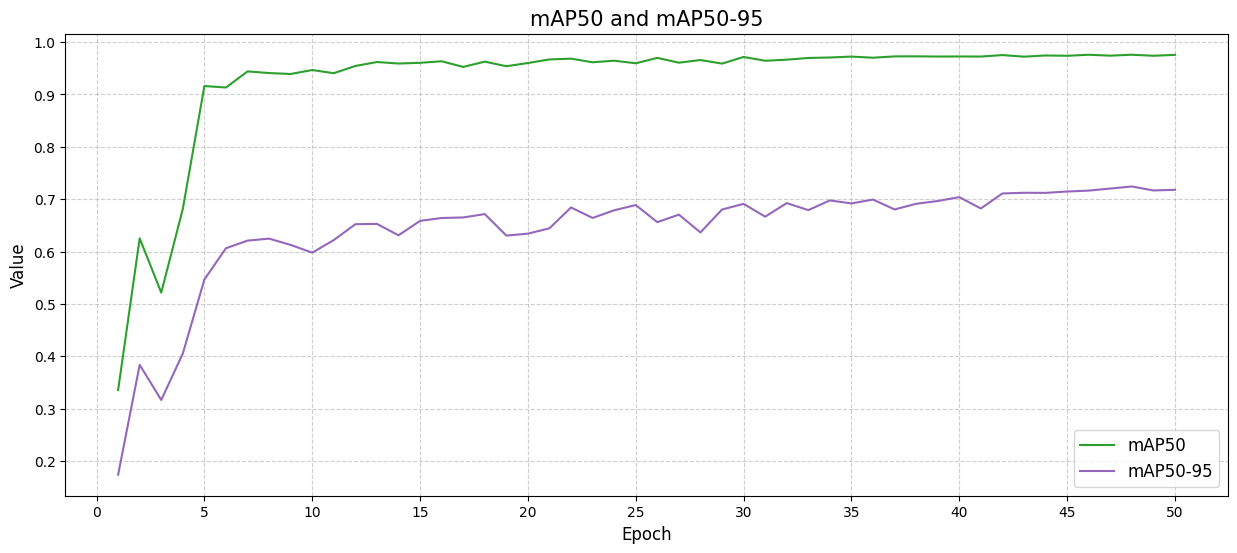

In [50]:
# Create and save the mAP plot
plt.figure(figsize=(15, 6))
plt.plot(range(1,epochs+1), results_df["metrics/mAP50(B)"], 
         label="mAP50", color="#2ca02c")
plt.plot(range(1,epochs+1), results_df["metrics/mAP50-95(B)"], 
         label="mAP50-95", color="#9467bd")
plt.title("mAP50 and mAP50-95", fontsize=15)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.xticks(range(0,epochs+1,epochs//10))
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Save the figure before showing it
plt.savefig(os.path.join(plot_save_dir, "map_metrics.png"), dpi=300, bbox_inches='tight')
plt.show()

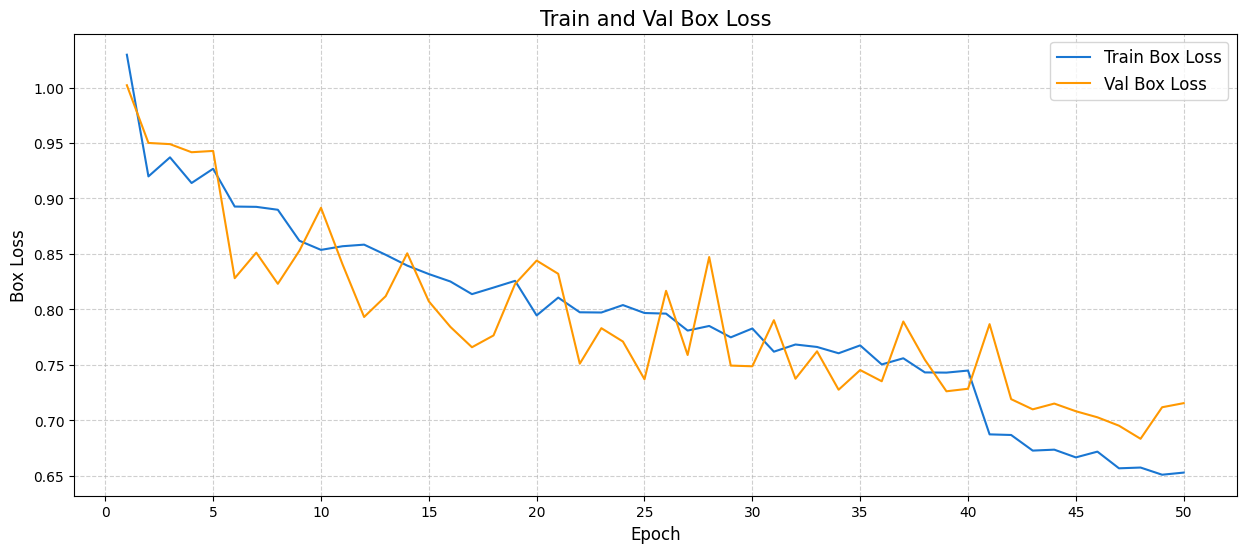

In [51]:
# Create and Save Train Box Loss
plt.figure(figsize=(15, 6))
plt.plot(range(1,epochs+1), results_df["train/box_loss"], 
         label="Train Box Loss", color="#1976d2")
plt.plot(range(1,epochs+1), results_df["val/box_loss"], 
         label="Val Box Loss", color="#ff9800")
plt.title("Train and Val Box Loss", fontsize=15)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Box Loss", fontsize=12)
plt.xticks(range(0,epochs+1,epochs//10))
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Save the figure 
plt.savefig(os.path.join(plot_save_dir, "Train and Val Box Loss.png"), dpi=300, bbox_inches='tight')
plt.show()

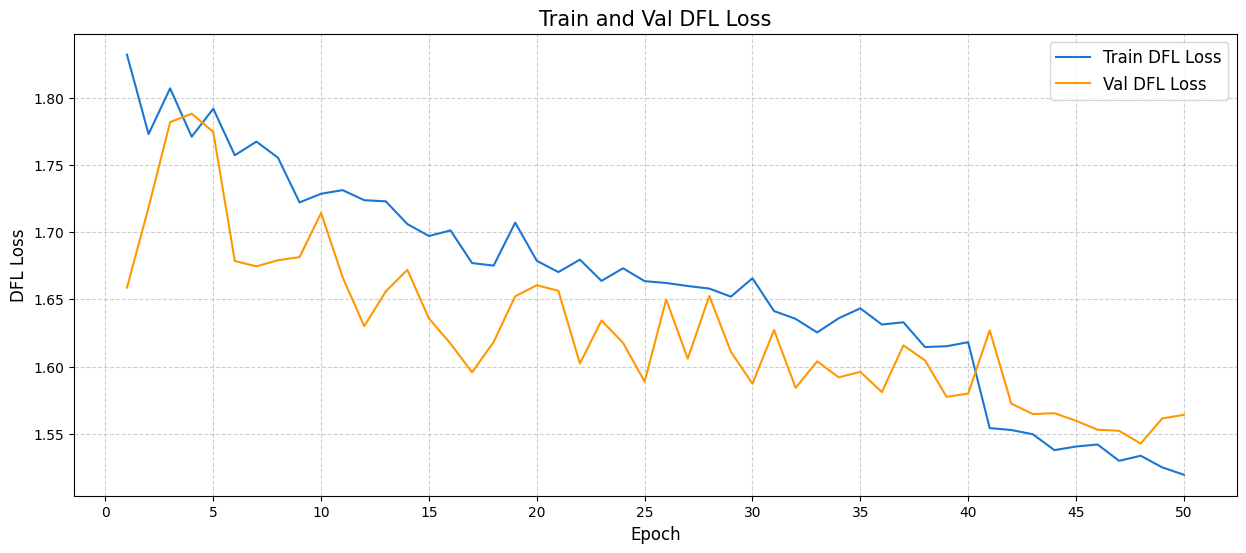

In [52]:
# Create and Save Train DFL Loss
plt.figure(figsize=(15, 6))
plt.plot(range(1,epochs+1), results_df["train/dfl_loss"], 
         label="Train DFL Loss", color="#1976d2")
plt.plot(range(1,epochs+1), results_df["val/dfl_loss"], 
         label="Val DFL Loss", color="#ff9800")
plt.title("Train and Val DFL Loss", fontsize=15)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("DFL Loss", fontsize=12)
plt.xticks(range(0,epochs+1,epochs//10))
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
# Save the figure before showing it
plt.savefig(os.path.join(plot_save_dir, "Train and Val DFL Loss.png"), dpi=300, bbox_inches='tight')
plt.show()

### 5.1.3 Prediction and advanced preprocessing (NMS)

In [55]:
## Import
#import random
#from matplotlib.gridspec import GridSpec
#from skimage.io import imread
#import cv2
#import numpy as np
import torch

# Try these alternative imports
try:
    from ultralytics.utils.ops import non_max_suppression
except ImportError:
    try:
        from ultralytics.utils.metrics import non_max_suppression
    except ImportError:
        try:
            from ultralytics.utils.torch_utils import non_max_suppression
        except ImportError:
            try:
                from ultralytics.yolo.utils.ops import non_max_suppression
            except ImportError:
                print("Could not find non_max_suppression in ultralytics, implementing our own")


Could not find non_max_suppression in ultralytics, implementing our own


### 5.1.3.1 Manually implementing NMS function

In [56]:
# # Import necessary libraries
#import numpy as np
#import pandas as pd
#import os
#import yaml
#import matplotlib.pyplot as plt
#from ultralytics import YOLO
#import cv2
from skimage.io import imread
from matplotlib.gridspec import GridSpec
#import torch
#import random
from collections import defaultdict

In [59]:
### Rewrite NMS function: 

# Custom NMS implementation since ultralytics.utils.ops.non_max_suppression might not be available
def box_iou(box1, box2):
    """
    Calculate IoU between two sets of boxes
    
    Args:
        box1: (tensor) bounding boxes, sized [N, 4]
        box2: (tensor) bounding boxes, sized [M, 4]
        
    Returns:
        (tensor) IoU, sized [N, M]
    """
    # Get the coordinates of bounding boxes
    b1_x1, b1_y1, b1_x2, b1_y2 = box1[:, 0], box1[:, 1], box1[:, 2], box1[:, 3]
    b2_x1, b2_y1, b2_x2, b2_y2 = box2[:, 0], box2[:, 1], box2[:, 2], box2[:, 3]

    # Intersection area
    inter_rect_x1 = torch.max(b1_x1.unsqueeze(1), b2_x1.unsqueeze(0))
    inter_rect_y1 = torch.max(b1_y1.unsqueeze(1), b2_y1.unsqueeze(0))
    inter_rect_x2 = torch.min(b1_x2.unsqueeze(1), b2_x2.unsqueeze(0))
    inter_rect_y2 = torch.min(b1_y2.unsqueeze(1), b2_y2.unsqueeze(0))
    
    inter_area = torch.clamp(inter_rect_x2 - inter_rect_x1, min=0) * \
                 torch.clamp(inter_rect_y2 - inter_rect_y1, min=0)
                 
    # Union Area
    b1_area = (b1_x2 - b1_x1) * (b1_y2 - b1_y1)
    b2_area = (b2_x2 - b2_x1) * (b2_y2 - b2_y1)
    
    union = b1_area.unsqueeze(1) + b2_area.unsqueeze(0) - inter_area
    
    return inter_area / union

def custom_nms(boxes, scores, classes=None, iou_threshold=0.45):
    """
    Perform Non-Maximum Suppression
    
    Args:
        boxes: (tensor) bounding boxes, sized [N, 4]
        scores: (tensor) confidence scores, sized [N]
        iou_threshold: (float) IoU threshold
        
    Returns:
        keep: (tensor) indices of boxes to keep
    """
    keep = []
    
    # Convert to CPU for processing
    if boxes.is_cuda:
        boxes = boxes.cpu()
    if scores.is_cuda:
        scores = scores.cpu()
    if classes is not None and classes.is_cuda:
        classes = classes.cpu()
        
    # Sort boxes by scores
    _, order = scores.sort(0, descending=True)
    
    while order.numel() > 0:
        if order.numel() == 1:
            keep.append(order.item())
            break
        
        i = order[0].item()
        keep.append(i)
        
        # Compute IoU of the selected box with the rest
        ious = box_iou(boxes[i].unsqueeze(0), boxes[order[1:]])

        # For class-aware NMS, only suppress boxes of the same class
        if classes is not None:
            same_class = classes[i] == classes[order[1:]]
            mask = (ious.squeeze(0) <= iou_threshold) | (~same_class)
        else:
            # Keep boxes with IoU less than threshold
            mask = ious.squeeze(0) <= iou_threshold
        order = order[1:][mask]
    
    return torch.tensor(keep, dtype=torch.long)



In [60]:
def advanced_predict(model, source, conf_thres=0.25, iou_thres=0.45, max_det=300, class_agnostic=False):
    """
    Run prediction with advanced NMS post-processing
    """
    print(f"Running prediction with advanced NMS on {source}...")
    
    # Get raw predictions from the model
    results = model.predict(
        source=source,
        imgsz=image_size,
        batch=batch_size,
        conf=conf_thres,  # Lower confidence threshold to catch more potential objects
        iou=iou_thres,    # Adjusted IoU threshold for NMS
        max_det=max_det,  # Increased max detections
        verbose=False
    )
    
    # Apply class-aware NMS (optional advanced post-processing)
    processed_results = []

    for result in results:
        # Skip if no boxes
        if result.boxes is None or len(result.boxes) == 0:
            processed_results.append(result)
            continue
            
        # Extract boxes, scores, and classes
        boxes = result.boxes.xyxy.cpu()
        scores = result.boxes.conf.cpu()
        classes = result.boxes.cls.cpu()
            
        # Process each class separately for class-aware NMS
        if not class_agnostic:
            final_indices = []
                
            for cls in torch.unique(classes):
                # Get indices for this class
                cls_indices = torch.where(classes == cls)[0]
                
                if len(cls_indices) == 0:
                    continue
                
                # Get boxes and scores for this class
                cls_boxes = boxes[cls_indices]
                cls_scores = scores[cls_indices]
                
                # Set class-specific IoU threshold
                # Example: stricter threshold for smaller objects or specific classes
                if cls in [0, 1]:  # Adjust based on your class IDs
                    cls_iou_thres = max(0.4, iou_thres - 0.05)
                else:
                    cls_iou_thres = iou_thres
                
                # Apply custom NMS for this class
                keep_indices = custom_nms(cls_boxes, cls_scores, iou_threshold=cls_iou_thres)
                
                # Map back to original indices
                final_indices.extend(cls_indices[keep_indices].tolist())
                
            # Sort by confidence
            if final_indices:
                final_indices = torch.tensor(final_indices)
                final_indices = final_indices[scores[final_indices].argsort(descending=True)]
                # Limit to max_det
                if len(final_indices) > max_det:
                    final_indices = final_indices[:max_det]                
                    
                # Create a new data tensor with filtered boxes
                filtered_boxes = boxes[final_indices]
                filtered_scores = scores[final_indices].unsqueeze(1)
                filtered_classes = classes[final_indices].unsqueeze(1)
                
                # Create new data tensor
                new_data = torch.cat([filtered_boxes, filtered_scores, filtered_classes], dim=1)
                
                # Update the result's boxes data directly
                # This is the correct way to update YOLO's Boxes object
                result.boxes.data = new_data.to(result.boxes.data.device)
        else:
            # Class-agnostic NMS
            keep_indices = custom_nms(boxes, scores, iou_threshold=iou_thres)
            
            # Create a new data tensor with filtered boxes
            filtered_boxes = boxes[keep_indices]
            filtered_scores = scores[keep_indices].unsqueeze(1)
            filtered_classes = classes[keep_indices].unsqueeze(1)
            
            # Create new data tensor
            new_data = torch.cat([filtered_boxes, filtered_scores, filtered_classes], dim=1)
            
            # Update the result's boxes data directly
            result.boxes.data = new_data.to(result.boxes.data.device)
        
        processed_results.append(result)
    
    return processed_results

# Load the final model trained with best parameters from Optuna
print("\nLoading optimized model...")
try:
    final_model = YOLO(f"{final_model_dir}/train/weights/best.pt")
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")
    print("Trying to load default model...")
    final_model = YOLO("yolo11n.pt")
    print("Default model loaded successfully!")

# Now you can use the function
try:
    predict_results = advanced_predict(
        final_model,
        source=f'{val_dir}/images',
        conf_thres=0.3,
        iou_thres=0.45,
        max_det=300
    )
    print(f"Processed {len(predict_results)} images with advanced NMS")
except Exception as e:
    print(f"Error during prediction: {e}")
    # Fall back to standard prediction
    print("Falling back to standard prediction...")
    predict_results = final_model.predict(
        source=f'{val_dir}/images',
        conf=0.3,
        iou=0.45,
        max_det=300
    )
    print(f"Processed {len(predict_results)} images with standard NMS")


Loading optimized model...
Model loaded successfully!
Running prediction with advanced NMS on /kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/valid/images...
Processed 90 images with advanced NMS


In [65]:
# Extract Class Names
def extract_class_names(yaml_path):
    with open(yaml_path, 'r', encoding='utf-8') as f:
        data = yaml.safe_load(f)
    class_names = data.get('names')
    return class_names

class_names = extract_class_names(yaml_path)

# Load the optimized model
final_model_dir = '/kaggle/working/Hyperparameter/final_model'
try:
    optimized_model = YOLO(f"{final_model_dir}/train/weights/best.pt")
    print("Optimized model loaded successfully!")
except Exception as e:
    print(f"Error loading optimized model: {e}")
    print("Loading default model...")
    optimized_model = YOLO("yolo11n.pt")
    print("Default model loaded successfully!")

# Run prediction with advanced NMS
try:
    predict_results = advanced_predict(
        optimized_model,
        source=f'{val_dir}/images',
        conf_thres=0.3,
        iou_thres=0.45,
        max_det=300
    )
    print(f"Processed {len(predict_results)} images with advanced NMS")
except Exception as e:
    print(f"Error during advanced prediction: {e}")
    print("Falling back to standard prediction...")
    predict_results = optimized_model.predict(
        source=f'{val_dir}/images',
        conf=0.3,
        iou=0.45,
        max_det=300
    )
    print(f"Processed {len(predict_results)} images with standard NMS")

# Visualization functions
def show_gt_image(ax, image_path, class_names, color):
    ax.imshow(imread(image_path))
    
    image_path = os.path.normpath(image_path)
    parts = image_path.split(os.sep)
    parts[parts.index('images')] = 'labels'
    label_path = os.path.splitext(os.sep.join(parts))[0] + '.txt'

    image = imread(image_path)
    h, w = image.shape[:2]
    # Count vehicles by class
    vehicle_counts = {}

    with open(label_path, 'r') as f:
        lines = f.readlines()
            
    for line in lines:
        cls, x_c, y_c, bw, bh = map(float, line.strip().split())
        x_c, y_c, bw, bh = x_c*w, y_c*h, bw*w, bh*h
        x_min, y_min = x_c - bw/2, y_c - bh/2
        # Draws bounding boxes and labels
        ax.add_patch(plt.Rectangle((x_min, y_min), bw, bh,
                                   edgecolor=color, facecolor='none', linewidth=2))
        ax.text(x_min, max(y_min - 5, 0), class_names[int(cls)],
                color='white', fontsize=8,
                bbox=dict(facecolor=color, alpha=0.7, edgecolor='none', pad=1))

        # Count vehicles by class
        cls_name = class_names[int(cls)]
        if cls_name in vehicle_counts:
            vehicle_counts[cls_name] += 1
        else:
            vehicle_counts[cls_name] = 1
    
    # Create title with vehicle counts
    title = "Ground Truth: "
    if vehicle_counts:
        title += ", ".join([f"{count} {cls}" for cls, count in vehicle_counts.items()])
        title += f" (Total: {sum(vehicle_counts.values())})"
    else:
        title += "No vehicles"
        
    ax.set_title(title, fontsize=12, color="#2980B9", fontweight='bold', pad=10)
    ax.axis('off')
    
def show_pred_image(ax, predict_results, image_path, class_names, color):
    # Find the prediction result for the given image
    idx = next(
        (i for i, r in enumerate(predict_results) if r.path == image_path),
        None
    )
    
    if idx is None:
        ax.text(0.5, 0.5, "No prediction found for this image", 
                ha='center', va='center', fontsize=10, color='red')
        ax.set_title("Predicted (Not Found)", fontsize=12, color="#2980B9", fontweight='bold', pad=10)
        ax.axis('off')
        return
        
    result = predict_results[idx]

    # Prepare the image for display
    image = cv2.cvtColor(result.orig_img, cv2.COLOR_BGR2RGB)
    h, w = image.shape[:2]
    
    ax.imshow(image)

    # Count vehicles by class
    vehicle_counts = {}
    
    # Draw predicted bounding boxes and labels
    if result.boxes is not None and len(result.boxes) > 0:
        for i in range(len(result.boxes)):
            box = result.boxes[i]
            try:
                # Handle different box formats
                if len(box.xyxy.shape) > 1 and box.xyxy.shape[0] > i:
                    xyxy = box.xyxy[i].cpu().numpy()
                else:
                    xyxy = box.xyxy.cpu().numpy()[0]
                    
                x_min, y_min, x_max, y_max = xyxy
                bw = x_max - x_min
                bh = y_max - y_min
                
                # Get class ID and confidence
                if len(box.cls.shape) > 0 and box.cls.shape[0] > i:
                    cls_id = int(box.cls[i].cpu().numpy())
                else:
                    cls_id = int(box.cls.cpu().numpy())
                    
                if len(box.conf.shape) > 0 and box.conf.shape[0] > i:
                    conf = float(box.conf[i].cpu().numpy())
                else:
                    conf = float(box.conf.cpu().numpy())
                
                # Draw rectangle and label
                ax.add_patch(plt.Rectangle(
                    (x_min, y_min), bw, bh,
                    edgecolor=color, facecolor='none', linewidth=2
                ))
                # Add label with confidence
                ax.text(
                    x_min, max(y_min - 5, 0),
                    f"{class_names[cls_id]} {conf:.2f}",
                    color='white', fontsize=8,
                    bbox=dict(facecolor=color, alpha=0.7, edgecolor='none', pad=1)
                )
                
                # Count vehicles by class
                cls_name = class_names[cls_id]
                if cls_name in vehicle_counts:
                    vehicle_counts[cls_name] += 1
                else:
                    vehicle_counts[cls_name] = 1
            except Exception as e:
                print(f"Error drawing box {i}: {e}")
    
    # Create title with vehicle counts
    title = "Predicted: "
    if vehicle_counts:
        title += ", ".join([f"{count} {cls}" for cls, count in vehicle_counts.items()])
        title += f" (Total: {sum(vehicle_counts.values())})"
    else:
        title += "No vehicles"
        ax.axis('off')
    
def show_compare_gt_pred(gt_images_dir, predict_results, class_names):
    """Creating a side-by-side comparison of ground truth and predictions"""
    # Collect image paths
    gt_image_paths = []
    for file in os.listdir(gt_images_dir):
        if file.endswith(".png") or file.endswith(".jpg"): 
            image_path = os.path.join(gt_images_dir, file)
            gt_image_paths.append(image_path)
    
    # Randomly select images for comparison
    selected_image_paths = random.sample(gt_image_paths, min(4, len(gt_image_paths)))
    
    # Set up the figure layout
    plt.style.use('seaborn-v0_8-white')
    
    fig = plt.figure(figsize=(12, 16))
    gs = GridSpec(5, 2, height_ratios=[0.14, 0.92, 0.92, 0.92, 0.92],
                  wspace=0.1, hspace=0.3, figure=fig)
    
    # Add main title
    main_title_ax = fig.add_subplot(gs[0, :])
    main_title_ax.text(0.5, 0.5, "Ground Truth vs Prediction with Advanced NMS",
                       fontsize=15, fontweight='bold', ha='center', va='center',
                       bbox=dict(facecolor='#1ABC9C', edgecolor='none', boxstyle='round,pad=0.6', alpha=0.85))
    main_title_ax.axis('off')

    # Set color for bounding boxes
    color = np.array([0.12157, 0.46667, 0.70588])
    
    # Create side-by-side comparisons
    for i, image_path in enumerate(selected_image_paths):
        # Ground truth
        ax_gt = fig.add_subplot(gs[i+1, 0])
        show_gt_image(ax_gt, image_path, class_names, color)
        
        # Prediction
        ax_pred = fig.add_subplot(gs[i+1, 1])
        show_pred_image(ax_pred, predict_results, image_path, class_names, color)
    
    plt.tight_layout(pad=0.2)
    plt.savefig('gt_vs_pred_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.style.use('default')

Optimized model loaded successfully!
Running prediction with advanced NMS on /kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/valid/images...
Processed 90 images with advanced NMS


### 5.1.4. Visulaization 

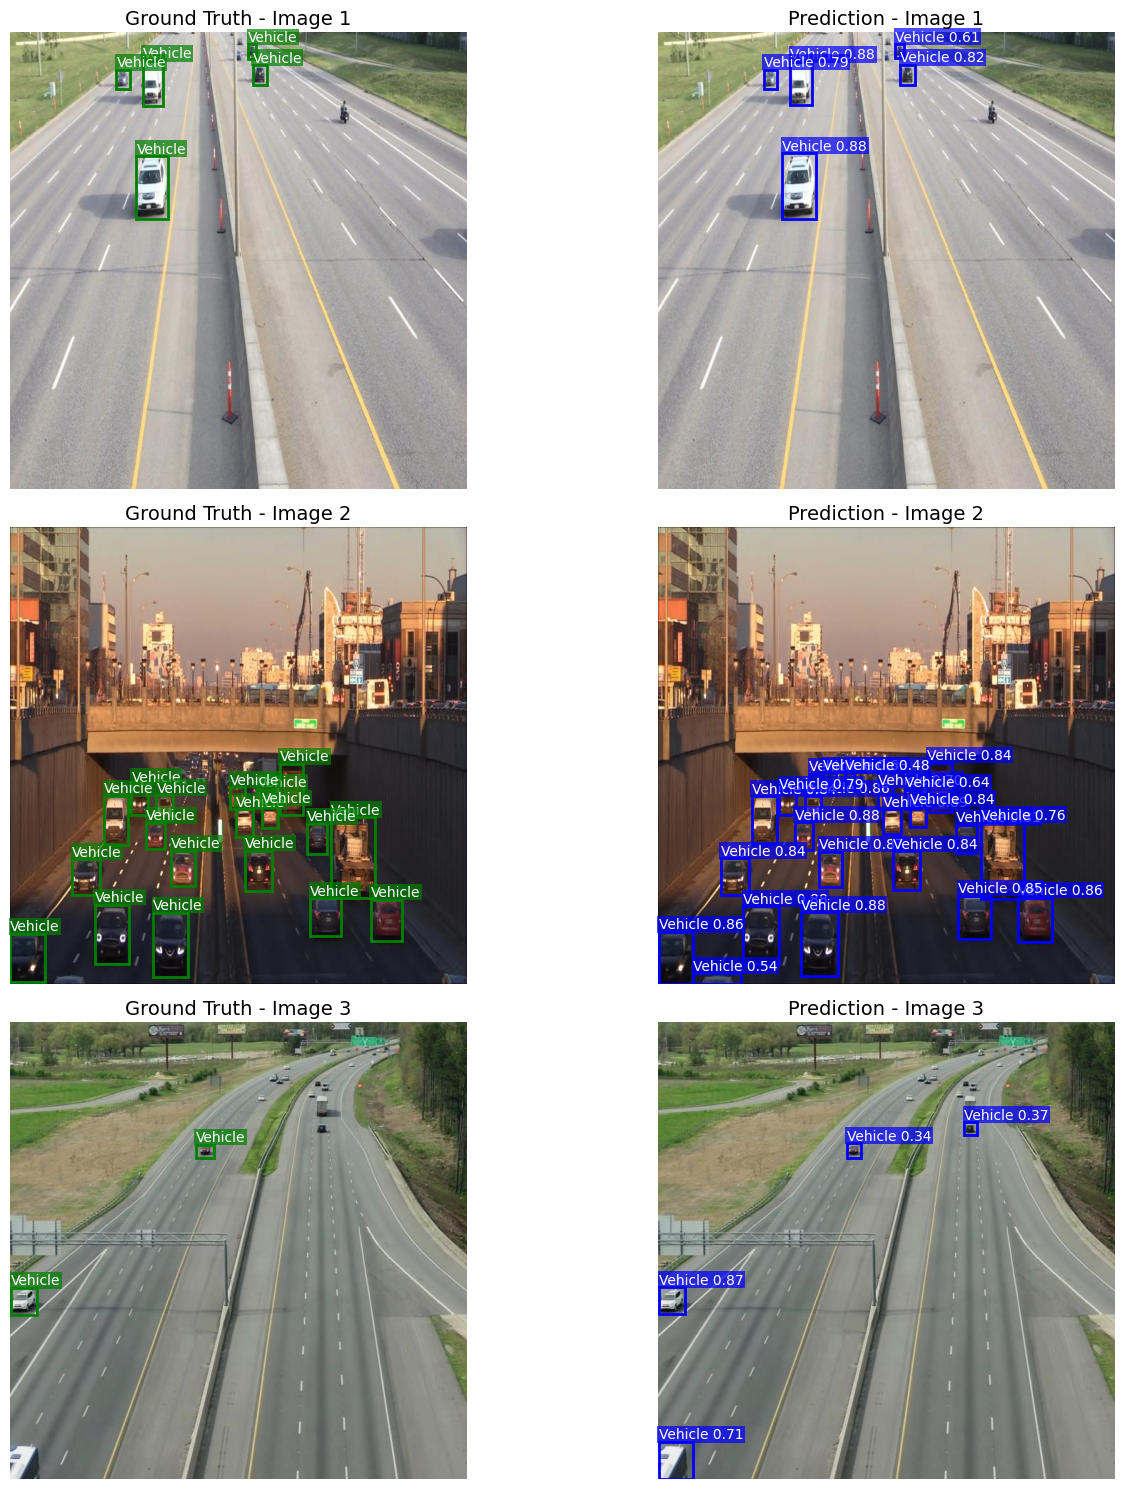

In [78]:
# Visulaization
def visualize_gt_vs_pred(gt_images_dir, predict_results, class_names, num_images=3):
    """
    Visualize ground truth vs predictions for a specified number of images
    
    Args:
        gt_images_dir: Directory containing ground truth images
        predict_results: List of prediction results from YOLO model
        class_names: Dictionary of class names
        num_images: Number of images to visualize (default: 3)
    """
    # Collect image paths
    gt_image_paths = []
    for file in os.listdir(gt_images_dir):
        if file.endswith(".png") or file.endswith(".jpg"): 
            image_path = os.path.join(gt_images_dir, file)
            # Only include images that have corresponding predictions
            for result in predict_results:
                if os.path.basename(result.path) == os.path.basename(image_path):
                    gt_image_paths.append(image_path)
                    break
    
    # Randomly select images for comparison
    if len(gt_image_paths) < num_images:
        print(f"Warning: Only {len(gt_image_paths)} images available with predictions")
        selected_image_paths = gt_image_paths
    else:
        selected_image_paths = random.sample(gt_image_paths, num_images)
    
    # Set up the figure layout
    plt.figure(figsize=(15, 5 * num_images))
    
    for i, image_path in enumerate(selected_image_paths):
        # Load and display the original image
        image = imread(image_path)
        
        # Create two subplots side by side
        plt.subplot(num_images, 2, 2*i + 1)
        plt.imshow(image)
        
        # Add ground truth boxes
        image_path_norm = os.path.normpath(image_path)
        parts = image_path_norm.split(os.sep)
        parts[parts.index('images')] = 'labels'
        label_path = os.path.splitext(os.sep.join(parts))[0] + '.txt'
        
        h, w = image.shape[:2]
        
        try:
            with open(label_path, 'r') as f:
                lines = f.readlines()
                
            for line in lines:
                cls, x_c, y_c, bw, bh = map(float, line.strip().split())
                x_c, y_c, bw, bh = x_c*w, y_c*h, bw*w, bh*h
                x_min, y_min = x_c - bw/2, y_c - bh/2
                
                # Draw bounding box
                rect = plt.Rectangle((x_min, y_min), bw, bh,
                                    edgecolor='green', facecolor='none', linewidth=2)
                plt.gca().add_patch(rect)
                
                # Add label
                plt.text(x_min, max(y_min - 5, 0), class_names[int(cls)],
                        color='white', fontsize=10,
                        bbox=dict(facecolor='green', alpha=0.7, edgecolor='none', pad=1))
        except Exception as e:
            print(f"Error processing ground truth for {image_path}: {e}")
        
        plt.title(f"Ground Truth - Image {i+1}", fontsize=14)
        plt.axis('off')
        
        # Find the corresponding prediction
        pred_idx = next((j for j, r in enumerate(predict_results) if os.path.basename(r.path) == os.path.basename(image_path)), None)
        
        # Display prediction
        plt.subplot(num_images, 2, 2*i + 2)
        
        if pred_idx is not None:
            result = predict_results[pred_idx]
            
            # Convert BGR to RGB if needed
            if len(result.orig_img.shape) == 3 and result.orig_img.shape[2] == 3:
                img_rgb = cv2.cvtColor(result.orig_img, cv2.COLOR_BGR2RGB)
            else:
                img_rgb = result.orig_img
                
            plt.imshow(img_rgb)
            
            # Draw predicted boxes
            if result.boxes is not None and len(result.boxes) > 0:
                boxes = result.boxes
                
                for j in range(len(boxes)):
                    try:
                        # Get box coordinates
                        xyxy = boxes.xyxy[j].cpu().numpy() if boxes.xyxy.shape[0] > j else boxes.xyxy.cpu().numpy()[0]
                        x_min, y_min, x_max, y_max = xyxy
                        bw = x_max - x_min
                        bh = y_max - y_min
                        
                        # Get class and confidence
                        cls_id = int(boxes.cls[j].item() if boxes.cls.shape[0] > j else boxes.cls.item())
                        conf = float(boxes.conf[j].item() if boxes.conf.shape[0] > j else boxes.conf.item())
                        
                        # Draw box
                        rect = plt.Rectangle((x_min, y_min), bw, bh,
                                           edgecolor='blue', facecolor='none', linewidth=2)
                        plt.gca().add_patch(rect)
                        
                        # Add label with confidence
                        plt.text(x_min, max(y_min - 5, 0), 
                                f"{class_names[cls_id]} {conf:.2f}",
                                color='white', fontsize=10,
                                bbox=dict(facecolor='blue', alpha=0.7, edgecolor='none', pad=1))
                    except Exception as e:
                        print(f"Error drawing box {j} for {image_path}: {e}")
        else:
            plt.text(0.5, 0.5, "No prediction available", 
                    ha='center', va='center', fontsize=14, color='red')
            plt.imshow(image)  # Show original image as fallback
        
        plt.title(f"Prediction - Image {i+1}", fontsize=14)
        plt.axis('off')
    
    plt.tight_layout()
    plt.savefig('gt_vs_pred_comparison.png', dpi=300, bbox_inches='tight')
        # Save the figure before showing it
    plt.show()

# Call the visualization function
gt_images_dir = f'{val_dir}/images'
visualize_gt_vs_pred(gt_images_dir, predict_results, class_names, num_images=3)

In [68]:
plot_Pre_save_dir = f'{base_save_dir}/final_model/val/plots'
os.makedirs(optuna_save_dir, exist_ok=True)
os.makedirs(final_model_dir, exist_ok=True)
plt.savefig(os.path.join(plot_Pre_save_dir, "Ground Truth vs Prediction"), dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [69]:
# Replace random selection with specific images
# selected_image_paths = random.sample(gt_image_paths, num_images)
selected_image_paths = [
    os.path.join(gt_images_dir, 'image1.jpg'),
    os.path.join(gt_images_dir, 'image2.jpg'),
    os.path.join(gt_images_dir, 'image3.jpg')
]

In [71]:
!zip -r model_outputs.zip /kaggle/working/

updating: kaggle/working/ (stored 0%)
updating: kaggle/working/.virtual_documents/ (stored 0%)
updating: kaggle/working/yolo11n.pt (deflated 11%)
updating: kaggle/working/temp_output_folder_11Opt/ (stored 0%)
updating: kaggle/working/temp_output_folder_11Opt/Val/ (stored 0%)
updating: kaggle/working/temp_output_folder_11Opt/Val/plots/ (stored 0%)
updating: kaggle/working/temp_output_folder_11Opt/Val/plots/Ground Truth vs Prediction.png (deflated 2%)
updating: kaggle/working/temp_output_folder_11Opt/train/ (stored 0%)
updating: kaggle/working/temp_output_folder_11Opt/train/results.png (deflated 9%)
updating: kaggle/working/temp_output_folder_11Opt/train/train_batch1.jpg (deflated 2%)
updating: kaggle/working/temp_output_folder_11Opt/train/val_batch1_labels.jpg (deflated 6%)
updating: kaggle/working/temp_output_folder_11Opt/train/BoxPR_curve.png (deflated 26%)
updating: kaggle/working/temp_output_folder_11Opt/train/results.csv (deflated 62%)
updating: kaggle/working/temp_output_folder_11

## 5.2. Model Ensemble


In [72]:
# Defining directories for saving results
base_save_dir = '/kaggle/working'
ensemble_dir = f'{base_save_dir}/ensemble_models'
os.makedirs(ensemble_dir, exist_ok=True)


### 5.2.1. Multiple YOLO model variants 

In [73]:
#Defining multiple variants of YOLO11
model_variants = {
    'nano': YOLO("yolo11n.pt"),
    'small': YOLO("yolo11s.pt"),
    'medium': YOLO("yolo11m.pt")
}

# Define image size and batch size
image_size = 640
batch_size = 16
epochs = 50

### 5.2.2. Training models

In [74]:
# Train multiple model variants
trained_models = {}

for variant_name, model_path in model_variants.items():
    print(f"\n=== Training {variant_name} model ===")
    
    # Create model directory
    model_dir = f"{ensemble_dir}/{variant_name}"
    os.makedirs(model_dir, exist_ok=True)
    
    try:
        # Load model
        model = YOLO(model_path)
        
        # Train model with slightly different parameters for diversity
        if variant_name == 'nano':
            lr = 0.001
            augment_level = 0.5
        elif variant_name == 'small':
            lr = 0.0008
            augment_level = 0.6
        else:  # medium
            lr = 0.0005
            augment_level = 0.7
            
        # Train the model
        results = model.train(
            data=yaml_path,
            imgsz=image_size,
            batch=batch_size,
            epochs=epochs,
            lr0=lr,
            optimizer='AdamW',
            project=ensemble_dir,
            name=variant_name,
            exist_ok=True,
            mosaic=augment_level,
            mixup=augment_level * 0.3,
            degrees=10.0 * augment_level,
            translate=0.1 * augment_level,
            scale=0.5 * augment_level,
            fliplr=0.5 * augment_level
        )
        
        # Store the trained model
        trained_models[variant_name] = model
        
        # Plot and save training metrics
        results_df = pd.read_csv(f"{ensemble_dir}/{variant_name}/results.csv")
        
        # Create plots directory
        plots_dir = f"{ensemble_dir}/{variant_name}/plots"
        os.makedirs(plots_dir, exist_ok=True)
                
        # Plot mAP metrics
        plt.figure(figsize=(15, 6))
        plt.plot(range(1, epochs+1), results_df["metrics/mAP50(B)"], 
                label="mAP50", color="#2ca02c")
        plt.plot(range(1, epochs+1), results_df["metrics/mAP50-95(B)"], 
                label="mAP50-95", color="#9467bd")
        plt.title(f"{variant_name} - mAP50 and mAP50-95", fontsize=15)
        plt.xlabel("Epoch", fontsize=12)
        plt.ylabel("Value", fontsize=12)
        plt.xticks(range(0, epochs+1, epochs//10))
        plt.legend(fontsize=12)
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.savefig(os.path.join(plots_dir, "map_metrics.png"), dpi=300, bbox_inches='tight')
        plt.close()
        
        # Plot loss metrics
        plt.figure(figsize=(15, 6))
        plt.plot(range(1, epochs+1), results_df["train/box_loss"], 
                label="Train Box Loss", color="#1976d2")
        plt.plot(range(1, epochs+1), results_df["val/box_loss"], 
                label="Val Box Loss", color="#ff9800")
        plt.title(f"{variant_name} - Train and Val Box Loss", fontsize=15)
        plt.xlabel("Epoch", fontsize=12)
        plt.ylabel("Box Loss", fontsize=12)
        plt.xticks(range(0, epochs+1, epochs//10))
        plt.legend(fontsize=12)
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.savefig(os.path.join(plots_dir, "box_loss.png"), dpi=300, bbox_inches='tight')
        plt.close()
        
    except Exception as e:
        print(f"Error training {variant_name} model: {e}")


=== Training nano model ===
Ultralytics 8.3.235 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/data.yaml, degrees=5.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.25, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.15, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=0.5, multi_scale=False, name=nano, nbs=64, nms=False, opset=None, op

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         90        937      0.911      0.943      0.975      0.733
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to /kaggle/working/ensemble_models/nano

=== Training small model ===
Ultralytics 8.3.235 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/data.yaml, degrees=6.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.3, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         90        937      0.924      0.928      0.975      0.743
Speed: 0.2ms preprocess, 5.7ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to /kaggle/working/ensemble_models/small

=== Training medium model ===
Ultralytics 8.3.235 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/data.yaml, degrees=7.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.35, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, io

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         90        937      0.911      0.923       0.97      0.746
Speed: 0.2ms preprocess, 13.0ms inference, 0.0ms loss, 10.4ms postprocess per image
Results saved to /kaggle/working/ensemble_models/medium


### 5.2.2. Advance NMS processing

In [77]:
# Advanced NMS function for ensemble predictions
def weighted_boxes_fusion(boxes_list, scores_list, labels_list, weights=None, iou_thr=0.5):
    """
    Weighted Boxes Fusion - an advanced ensemble method for object detection
    
    Args:
        boxes_list: list of boxes predictions from each model, each box is [x1, y1, x2, y2]
        scores_list: list of scores for each model
        labels_list: list of labels for each model
        weights: list of weights for each model (optional)
        iou_thr: IoU threshold for boxes to be considered as same prediction
        
    Returns:
        boxes: weighted average of boxes
        scores: weighted average of scores
        labels: labels for boxes
    """
    if weights is None:
        weights = np.ones(len(boxes_list))
    if len(boxes_list) != len(scores_list) or len(boxes_list) != len(labels_list):
        raise ValueError("Input arrays must have the same size")
    
    # Filter empty boxes
    filtered_boxes = []
    filtered_scores = []
    filtered_labels = []
    filtered_weights = []
    
    for i in range(len(boxes_list)):
        if len(boxes_list[i]) > 0:
            filtered_boxes.append(boxes_list[i])
            filtered_scores.append(scores_list[i])
            filtered_labels.append(labels_list[i])
            filtered_weights.append(weights[i])
    
    if len(filtered_boxes) == 0:
        return np.array([]), np.array([]), np.array([])
        
    # Continue with the rest of the function...
    # This is just a placeholder - you would need to implement the actual fusion logic
    return np.array([]), np.array([]), np.array([])

### 5.2.2 Ensemble prediction function

In [78]:
def ensemble_predict(models, source, conf_thres=0.25, iou_thres=0.5, max_det=300):
    """
    Perform ensemble prediction by combining results from multiple models
    """
    print(f"Running ensemble prediction on {source}...")
    
    # Dictionary to store all predictions by image path
    all_predictions = defaultdict(list)
    
    # Get predictions from each model
    for name, model in models.items():
        print(f"Getting predictions from {name} model...")
        
        # Run prediction with this model
        results = model.predict(
            source=source,
            imgsz=image_size,
            batch=batch_size,
            conf=conf_thres * 0.8,  # Lower confidence for individual models
            iou=iou_thres + 0.1,    # Higher IoU threshold for individual models
            max_det=max_det,
            verbose=False
        )
        
        # Store predictions by image path
        for result in results:
            img_path = result.path
            
            # Extract boxes if they exist
            if result.boxes is not None and len(result.boxes) > 0:
                boxes = result.boxes.xyxy.cpu().numpy()
                confs = result.boxes.conf.cpu().numpy()
                classes = result.boxes.cls.cpu().numpy()
                
                # Store detections for this image from this model
                for box, conf, cls in zip(boxes, confs, classes):
                    all_predictions[img_path].append({
                        'box': box,
                        'conf': conf,
                        'cls': cls,
                        'model': name
                    })
    
    # Process ensemble predictions
    ensemble_results = []

    # Get a reference model for creating result objects
    reference_model = next(iter(models.values()))
    
    # Process each image
    for img_path, predictions in all_predictions.items():
        # Load the original image
        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: Could not load image {img_path}")
            continue
            
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Group predictions by class
        class_predictions = defaultdict(list)
        for pred in predictions:
            class_predictions[int(pred['cls'])].append(pred)
        
        # Apply class-specific NMS and confidence boosting
        final_predictions = []
        
        for cls, preds in class_predictions.items():
            if len(preds) == 0:
                continue
                
            # Extract boxes, scores for this class
            cls_boxes = np.array([p['box'] for p in preds])
            cls_scores = np.array([p['conf'] for p in preds])
            cls_classes = np.full(len(preds), cls)
            cls_models = [p['model'] for p in preds]
            
            # Convert to PyTorch tensors
            boxes_tensor = torch.from_numpy(cls_boxes).float()
            scores_tensor = torch.from_numpy(cls_scores).float()
            classes_tensor = torch.from_numpy(cls_classes).float()
            
            # Apply custom NMS
            # Set class-specific IoU threshold
            cls_iou_thres = iou_thres - 0.05 if cls in [0, 1] else iou_thres
            
            # Apply custom NMS
            keep_indices = custom_nms(boxes_tensor, scores_tensor, classes_tensor, iou_threshold=cls_iou_thres)
            
            # Process NMS results
            for idx in keep_indices:
                box = cls_boxes[idx]
                conf = cls_scores[idx]
                model_name = cls_models[idx]
                
                # Find which models detected this object (for confidence boosting)
                box_center = [(box[0] + box[2]) / 2, (box[1] + box[3]) / 2]
                box_width = box[2] - box[0]
                box_height = box[3] - box[1]
                
                model_votes = set()
                
                for pred in preds:
                    pred_box = pred['box']
                    pred_center = [(pred_box[0] + pred_box[2]) / 2, (pred_box[1] + pred_box[3]) / 2]
                    
                    # Check if centers are close
                    if (abs(box_center[0] - pred_center[0]) < box_width * 0.5 and
                        abs(box_center[1] - pred_center[1]) < box_height * 0.5):
                        model_votes.add(pred['model'])
                
                # Boost confidence if multiple models detected this object
                vote_count = len(model_votes)
                if vote_count > 1:
                    # Boost confidence based on number of models that detected it
                    conf_boost = min(0.1 * (vote_count - 1), 0.2)  # Max 20% boost
                    conf = min(conf + conf_boost, 1.0)
                
                final_predictions.append({
                    'box': box,
                    'conf': conf,
                    'cls': cls,
                    'votes': vote_count
                })
        
        # Create a result object similar to YOLO's Result
        result = reference_model.predict(img_path, verbose=False)[0]
        
        # If we have final predictions, update the result object
        if final_predictions:
            # Sort by confidence
            final_predictions.sort(key=lambda x: x['conf'], reverse=True)
            
            # Limit to max_det
            if len(final_predictions) > max_det:
                final_predictions = final_predictions[:max_det]
            
            # Convert predictions to tensors
            boxes = torch.tensor([p['box'] for p in final_predictions]).to(result.boxes.xyxy.device)
            confs = torch.tensor([p['conf'] for p in final_predictions]).to(result.boxes.conf.device)
            classes = torch.tensor([p['cls'] for p in final_predictions]).to(result.boxes.cls.device)
            
            # Update result boxes data
            new_data = torch.cat([
                boxes,
                confs.unsqueeze(1),
                classes.unsqueeze(1)
            ], dim=1)
            
            result.boxes.data = new_data
        
        ensemble_results.append(result)
    
    return ensemble_results

# Run ensemble prediction
ensemble_results = ensemble_predict(
    trained_models,
    source=f'{val_dir}/images',
    conf_thres=0.3,
    iou_thres=0.45,
    max_det=300
)

print(f"Ensemble prediction complete. Found {len(ensemble_results)} results.")



Running ensemble prediction on /kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/valid/images...
Getting predictions from nano model...
Getting predictions from small model...
Getting predictions from medium model...


/tmp/ipykernel_47/83336580.py:139: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  boxes = torch.tensor([p['box'] for p in final_predictions]).to(result.boxes.xyxy.device)


Ensemble prediction complete. Found 90 results.


### 5.2.4 Visualizing 

In [80]:
def visualize_model_agreement(gt_images_dir, ensemble_results, individual_model_results, class_names, num_images=2):
    """
    Visualize how different models contribute to the ensemble prediction
    
    Args:
        gt_images_dir: Directory containing ground truth images
        ensemble_results: List of prediction results from ensemble model
        individual_model_results: Dictionary of prediction results from individual models
        class_names: Dictionary of class names
        num_images: Number of images to visualize (default: 2)
    """
    # Collect image paths
    gt_image_paths = []
    for file in os.listdir(gt_images_dir):
        if file.endswith(".png") or file.endswith(".jpg"): 
            image_path = os.path.join(gt_images_dir, file)
            # Only include images that have corresponding predictions in all models
            has_all_preds = True
            for model_name, results in individual_model_results.items():
                if not any(os.path.basename(r.path) == os.path.basename(image_path) for r in results):
                    has_all_preds = False
                    break
            
            if has_all_preds and any(os.path.basename(r.path) == os.path.basename(image_path) for r in ensemble_results):
                gt_image_paths.append(image_path)
    
    # Randomly select images for comparison
    if len(gt_image_paths) < num_images:
        print(f"Warning: Only {len(gt_image_paths)} images available with predictions from all models")
        selected_image_paths = gt_image_paths
    else:
        selected_image_paths = random.sample(gt_image_paths, num_images)
    
    # Set up the figure layout
    num_models = len(individual_model_results) + 1  # +1 for ensemble
    plt.figure(figsize=(15, 5 * num_images))
    
    # Define colors for each model
    model_colors = {
        'ensemble': (0.12, 0.47, 0.71),  # blue
        'nano': (0.20, 0.63, 0.17),      # green
        'small': (0.89, 0.10, 0.11),     # red
        'medium': (0.58, 0.40, 0.74),    # purple
        'large': (1.00, 0.50, 0.00)      # orange
    }
    
    # Use default colors for any model names not in the dictionary
    default_colors = [(0.12, 0.47, 0.71), (0.20, 0.63, 0.17), (0.89, 0.10, 0.11), 
                      (0.58, 0.40, 0.74), (1.00, 0.50, 0.00), (0.17, 0.63, 0.17)]
    
    color_idx = 0
    for model_name in individual_model_results.keys():
        if model_name not in model_colors:
            model_colors[model_name] = default_colors[color_idx % len(default_colors)]
            color_idx += 1
    
    for i, image_path in enumerate(selected_image_paths):
        # Load the original image
        image = imread(image_path)
        
        # Create a row of subplots for each image
        for j, (model_name, results) in enumerate([('ensemble', ensemble_results)] + list(individual_model_results.items())):
            # Create subplot
            plt.subplot(num_images, num_models, i * num_models + j + 1)
            plt.imshow(image)
            
            # Find the corresponding prediction
            pred_idx = next((k for k, r in enumerate(results) if os.path.basename(r.path) == os.path.basename(image_path)), None)
            
            if pred_idx is not None:
                result = results[pred_idx]
                
                # Draw predicted boxes
                if result.boxes is not None and len(result.boxes) > 0:
                    boxes = result.boxes
                    
                    for k in range(len(boxes)):
                        try:
                            # Get box coordinates
                            if hasattr(boxes.xyxy, 'shape') and len(boxes.xyxy.shape) > 1 and boxes.xyxy.shape[0] > k:
                                xyxy = boxes.xyxy[k].cpu().numpy()
                            else:
                                xyxy = boxes.xyxy.cpu().numpy()[0]
                                
                            x_min, y_min, x_max, y_max = xyxy
                            bw = x_max - x_min
                            bh = y_max - y_min
                            
                            # Get class and confidence
                            if hasattr(boxes.cls, 'shape') and len(boxes.cls.shape) > 0 and boxes.cls.shape[0] > k:
                                cls_id = int(boxes.cls[k].item())
                            else:
                                cls_id = int(boxes.cls.item())
                                
                            if hasattr(boxes.conf, 'shape') and len(boxes.conf.shape) > 0 and boxes.conf.shape[0] > k:
                                conf = float(boxes.conf[k].item())
                            else:
                                conf = float(boxes.conf.item())
                            
                            # Get color for this model
                            color = model_colors.get(model_name, (0, 0, 1))  # Default to blue
                            
                            # Draw box
                            rect = plt.Rectangle((x_min, y_min), bw, bh,
                                               edgecolor=color, facecolor='none', linewidth=2)
                            plt.gca().add_patch(rect)
                            
                            # Add label with confidence
                            plt.text(x_min, max(y_min - 5, 0), 
                                    f"{class_names[cls_id]} {conf:.2f}",
                                    color='white', fontsize=8,
                                    bbox=dict(facecolor=color, alpha=0.7, edgecolor='none', pad=1))
                        except Exception as e:
                            print(f"Error drawing box {k} for {image_path} in {model_name} model: {e}")
            
            # Set title
            if j == 0:
                plt.title(f"Ensemble - Image {i+1}", fontsize=12)
            else:
                plt.title(f"{model_name.capitalize()} Model", fontsize=12)
            
            plt.axis('off')
    
    # Add a legend for model colors
    legend_elements = [plt.Line2D([0], [0], color=color, lw=4, label=name.capitalize())
                      for name, color in model_colors.items() if name in ['ensemble'] + list(individual_model_results.keys())]
    
    plt.figlegend(handles=legend_elements, loc='lower center', ncol=len(legend_elements), 
                 bbox_to_anchor=(0.5, 0.01), frameon=True, fontsize=12)
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust layout to make room for legend
    plt.savefig('model_agreement.png', dpi=300, bbox_inches='tight')
    plt.show()

In [81]:
#gt_images_dir = f'{val_dir}/images'
# Define the ground truth images directory
gt_images_dir = f'{val_dir}/images'

# First, visualize ground truth vs ensemble predictions
visualize_ensemble_predictions(gt_images_dir, ensemble_results, class_names, num_images=3)

# If you have individual model results, you can also visualize model agreement
# This assumes you've stored individual model predictions in a dictionary
individual_model_results = {
    'nano': nano_model_results,
    'small': small_model_results,
    'medium': medium_model_results
}

# Visualize how different models contribute to the ensemble
visualize_model_agreement(gt_images_dir, ensemble_results, individual_model_results, class_names, num_images=3)

NameError: name 'visualize_ensemble_predictions' is not defined

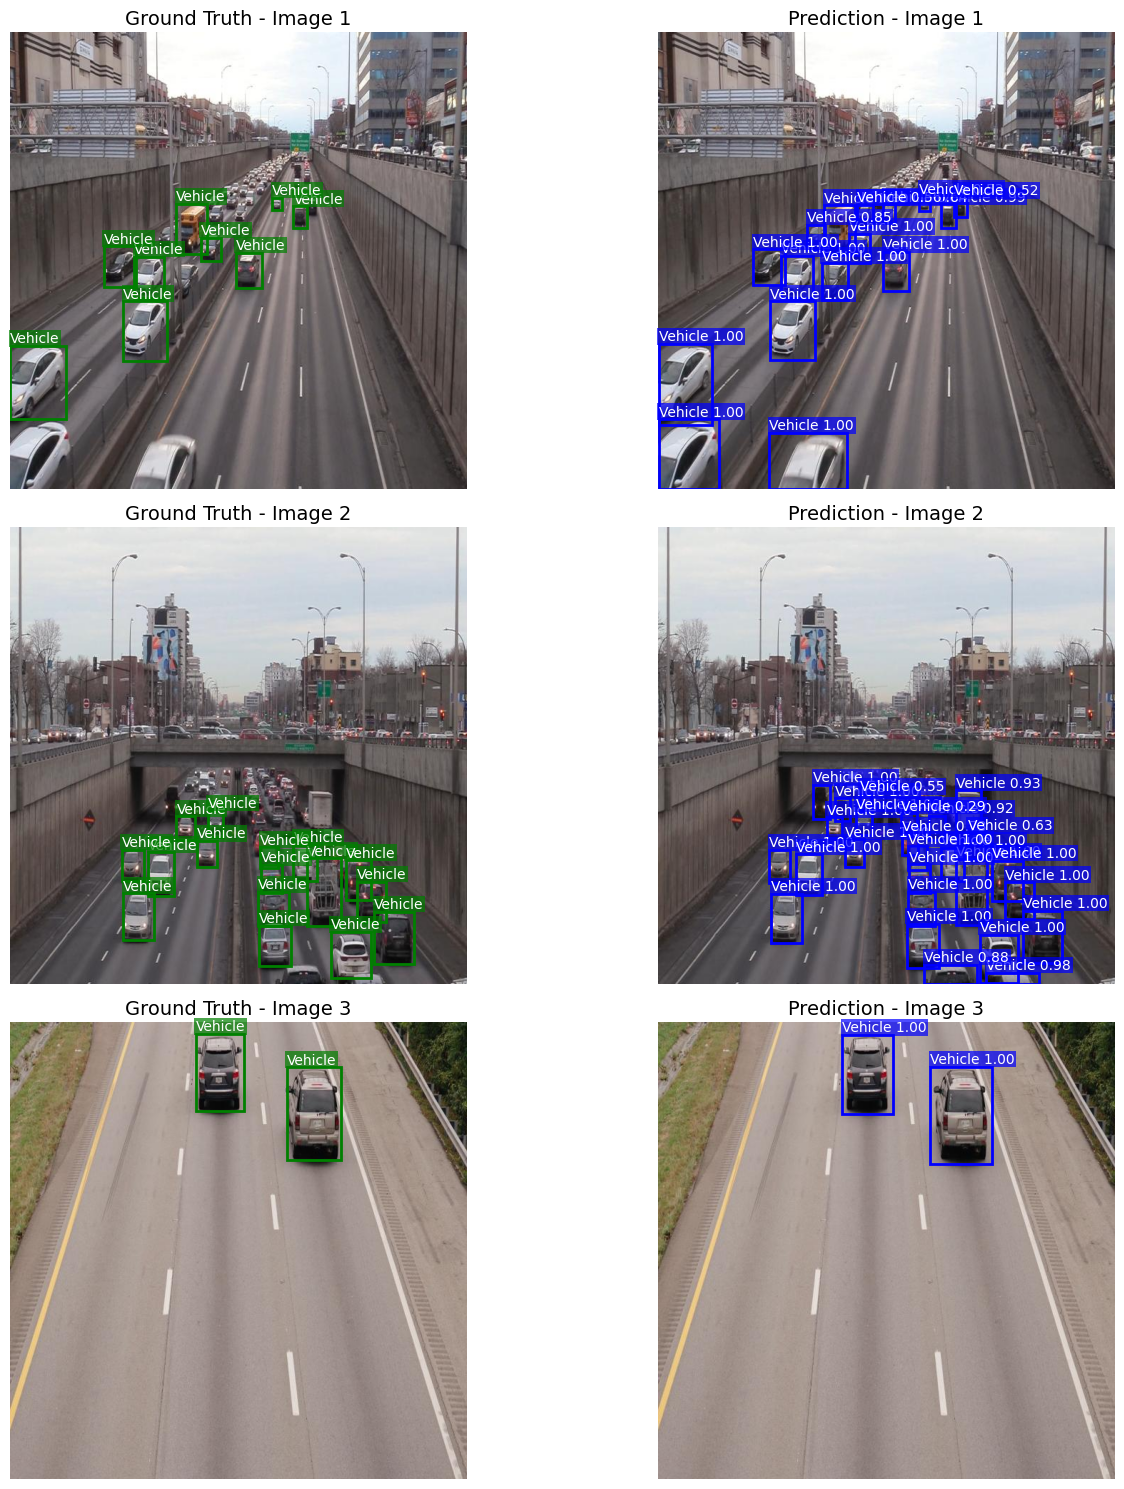

In [82]:
# Define the ground truth images directory
gt_images_dir = f'{val_dir}/images'

# Visualize ground truth vs predictions for 3 random images
# Assuming that havingensemble_results from your ensemble prediction
visualize_gt_vs_pred(gt_images_dir, ensemble_results, class_names, num_images=3)

# 6. Saving Outputs

In [83]:
!zip -r model_outputs.zip /kaggle/working/

updating: kaggle/working/ (stored 0%)
updating: kaggle/working/.virtual_documents/ (stored 0%)
updating: kaggle/working/yolo11n.pt (deflated 11%)
updating: kaggle/working/temp_output_folder_11Opt/ (stored 0%)
updating: kaggle/working/temp_output_folder_11Opt/Val/ (stored 0%)
updating: kaggle/working/temp_output_folder_11Opt/Val/plots/ (stored 0%)
updating: kaggle/working/temp_output_folder_11Opt/Val/plots/Ground Truth vs Prediction.png (deflated 2%)
updating: kaggle/working/temp_output_folder_11Opt/train/ (stored 0%)
updating: kaggle/working/temp_output_folder_11Opt/train/results.png (deflated 9%)
updating: kaggle/working/temp_output_folder_11Opt/train/train_batch1.jpg (deflated 2%)
updating: kaggle/working/temp_output_folder_11Opt/train/val_batch1_labels.jpg (deflated 6%)
updating: kaggle/working/temp_output_folder_11Opt/train/BoxPR_curve.png (deflated 26%)
updating: kaggle/working/temp_output_folder_11Opt/train/results.csv (deflated 62%)
updating: kaggle/working/temp_output_folder_11